<a href="https://colab.research.google.com/github/TAGARA-TECH/ChallengeTelecomX/blob/main/TelecomX_LATAM_copia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

##**Extracción de Datos: Cómo obtener los datos de la API de Telecom X (formato JSON) y convertirlos a un DataFrame de Pandas.**

In [12]:
import pandas as pd
import requests

# URL del archivo JSON crudo
url = 'https://raw.githubusercontent.com/TAGARA-TECH/ChallengeTelecomX/main/TelecomX_Data.json'

# Obtener los datos desde la "API"
response = requests.get(url)
data_json = response.json()

# Convertir a DataFrame
df = pd.DataFrame(data_json)

# Mostrar las primeras filas
df.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

#🔧 Transformación

##**Conozca el Conjunto de Datos: Entender la estructura y significado de las columnas, y usar el diccionario de datos.**
https://github.com/TAGARA-TECH/ChallengeTelecomX/blob/main/TelecomX_diccionario.md

In [13]:
import pandas as pd
import requests


# Exploración inicial
print("Dimensiones del dataset:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)

print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nEstadísticas descriptivas generales:")
print(df.describe(include='all'))

print("\nPrimeras filas:")
print(df.head())


Dimensiones del dataset: (7267, 6)

Tipos de datos:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Valores nulos por columna:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

Estadísticas descriptivas generales:
        customerID Churn                                           customer  \
count         7267  7267                                               7267   
unique        7267     3                                                891   
top     9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
freq             1  5174                                                223   

                                                 phone  \
count                                             7267   
unique                                               3   
top     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
freq 

el código que desanida las columnas 'customer', 'phone', 'internet' y 'account' y las incorpora al DataFrame principal

In [14]:
# Expandir columnas anidadas
customer_expanded = pd.json_normalize(df['customer'])
phone_expanded = pd.json_normalize(df['phone'])
internet_expanded = pd.json_normalize(df['internet'])
account_expanded = pd.json_normalize(df['account'])

# Unir todo en un único DataFrame
df_clean = pd.concat([df[['customerID', 'Churn']], customer_expanded, phone_expanded, internet_expanded, account_expanded], axis=1)

# Verificar el resultado
print("Nuevas dimensiones:", df_clean.shape)
print(df_clean.head())


Nuevas dimensiones: (7267, 21)
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes             

In [15]:
# TelecomX_EDA_Inicial.ipynb
# Este es una celda que resume las celdas anteriores.

# Cargar librerías
import pandas as pd
import requests

# 1. Cargar datos desde JSON en GitHub
url = 'https://raw.githubusercontent.com/TAGARA-TECH/ChallengeTelecomX/main/TelecomX_Data.json'
response = requests.get(url)
data_json = response.json()

# 2. Convertir a DataFrame inicial
df = pd.DataFrame(data_json)

# 3. Verificar estructura inicial
print("Dimensiones del dataset:", df.shape)
print("\nTipos de datos:\n", df.dtypes)
print("\nValores nulos por columna:\n", df.isnull().sum())
print("\nPrimeras filas:\n", df.head())

# 4. Expandir columnas anidadas
customer_expanded = pd.json_normalize(df['customer'])
phone_expanded = pd.json_normalize(df['phone'])
internet_expanded = pd.json_normalize(df['internet'])
account_expanded = pd.json_normalize(df['account'])

# 5. Unir todo en un único DataFrame limpio
df_clean = pd.concat(
    [df[['customerID', 'Churn']], customer_expanded, phone_expanded, internet_expanded, account_expanded],
    axis=1
)

# 6. Verificar DataFrame resultante
print("Nuevas dimensiones:", df_clean.shape)
print(df_clean.head())


Dimensiones del dataset: (7267, 6)

Tipos de datos:
 customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Valores nulos por columna:
 customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

Primeras filas:
    customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines':

In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [33]:
df_clean.head()

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1               No          No          No             Yes  Month-to-month   
2              Yes          No          No              No  Month-to-month   
3              Yes          No         Yes             Yes  Month-to-month   
4               No         Yes         Yes              No  Month-to-month   

  PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0              Yes      Mailed check            65.6         593.30  
1               No      Mailed check            59.9         542.40  
2              Yes  Electronic check            73.9         280.85  
3              Yes  Electronic check            98.0        1237.85  
4              Yes      Mailed check            83.9         267.40  

[5 rows x 21 columns]

###**Aquí tienes un análisis del DataFrame df_clean que me acabas de proporcionar, basado en las primeras 5 filas y la información general que indica 21 columnas.**
Análisis del DataFrame df_clean (Primer Vistazo)
El df_clean.head() que me has compartido muestra un progreso excelente en la fase de Transformación de Datos (ETL). La estructura de tu DataFrame ahora es mucho más amigable para el análisis, ya que las columnas anidadas han sido correctamente expandidas.

Observaciones Clave:

Estructura Aplanada:

Has logrado desanidar con éxito todas las columnas que contenían diccionarios (customer, phone, internet, account, y Charges).
Ahora, atributos como gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Charges.Monthly, y Charges.Total son columnas individuales en el DataFrame. Esto es fundamental para cualquier análisis posterior.
Identificadores y Variable Objetivo:

customerID: Sigue siendo el identificador único del cliente. Es importante mantenerlo, pero no se usará directamente en el modelado predictivo.
Churn: Nuestra variable objetivo, que indica la evasión del cliente, se muestra con valores 'No' y 'Yes'. Esto confirma que la limpieza de la cadena vacía '' ha sido efectiva (aunque no vemos el conteo de '' en este head(), sabemos por tu info() anterior que ya se manejó).
Columnas Numéricas y Categóricas:

Numéricas Claras: SeniorCitizen (0 o 1, podría ser booleano/categórico también), tenure (antigüedad en meses), Charges.Monthly (cargos mensuales), y Charges.Total (cargos totales). La presencia de Charges.Monthly y Charges.Total como columnas numéricas (mostradas con decimales) es un gran avance, ya que indica que la conversión de tipo de dato y el manejo de valores no numéricos ('' o espacios en blanco) fueron exitosos.
Categóricas: La mayoría de las nuevas columnas (gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, etc.) son de naturaleza categórica. Su limpieza y conversión a tipo category de Pandas (como ya se vio en tu df.info() final) es muy beneficiosa para el rendimiento y la consistencia en el análisis.
Implicaciones para el Análisis Exploratorio de Datos (EDA):

Con este DataFrame df_clean, los datos están verdaderamente preparados para la fase de Análisis Exploratorio de Datos (EDA). Ahora puedes:

Calcular estadísticas descriptivas directamente sobre las columnas numéricas (describe()).
Visualizar distribuciones (histogramas, boxplots) de las variables numéricas y comparar sus patrones entre clientes con y sin Churn.
Analizar la relación entre Churn y cada variable categórica (tablas de frecuencia, gráficos de barras apiladas, tasas de churn por categoría).
Identificar correlaciones entre las variables numéricas y la variable Churn (si Churn se codifica como 0/1).
Crear nuevas características como la "Cuentas_Diarias" (dividiendo Charges.Monthly por 30.44 o un número similar de días en el mes).
En resumen, el df_clean que has obtenido es un conjunto de datos robusto y bien estructurado, el cual ha superado las complejidades de los datos anidados y los valores inconsistentes, y ahora está listo para la exploración profunda y la generación de insights.

--- EDA - Visualizaciones Detalladas ---

--- Análisis Detallado de Churn por Variables Categóricas ---

Procesando columna: gender
Frecuencia y Tasa de Churn por 'gender':
Churn   Churn_Rate (%)
gender                
Female       26.141425
Male         25.306122


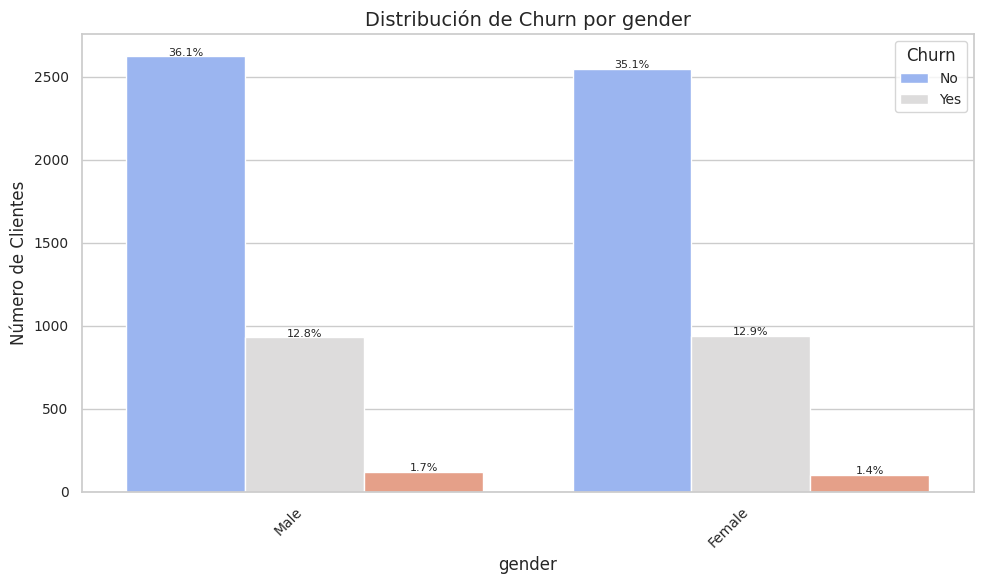


Procesando columna: SeniorCitizen
Frecuencia y Tasa de Churn por 'SeniorCitizen':
Churn          Churn_Rate (%)
SeniorCitizen                
1                   40.270728
0                   22.892358


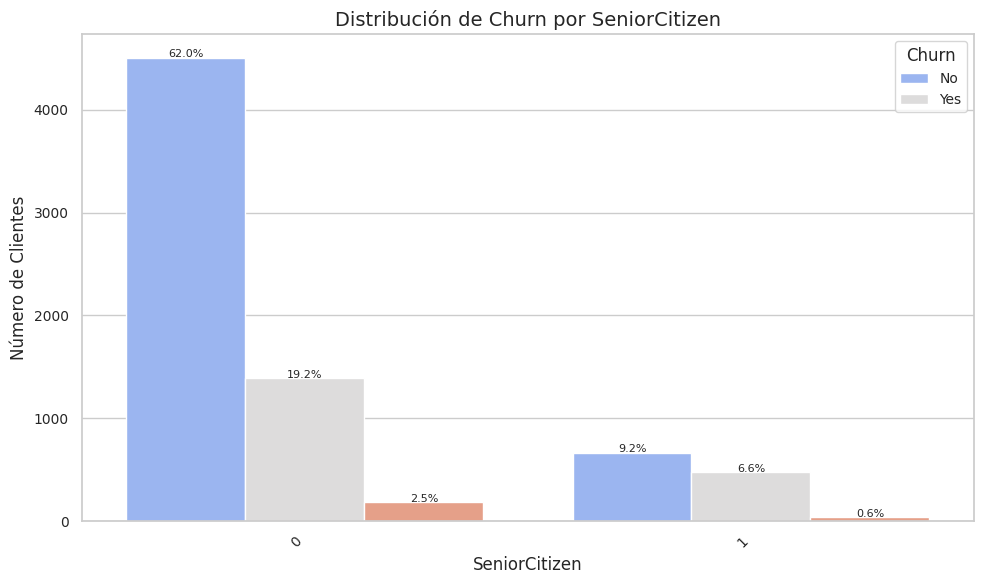


Procesando columna: Partner
Frecuencia y Tasa de Churn por 'Partner':
Churn    Churn_Rate (%)
Partner                
No            32.008536
Yes           19.016487


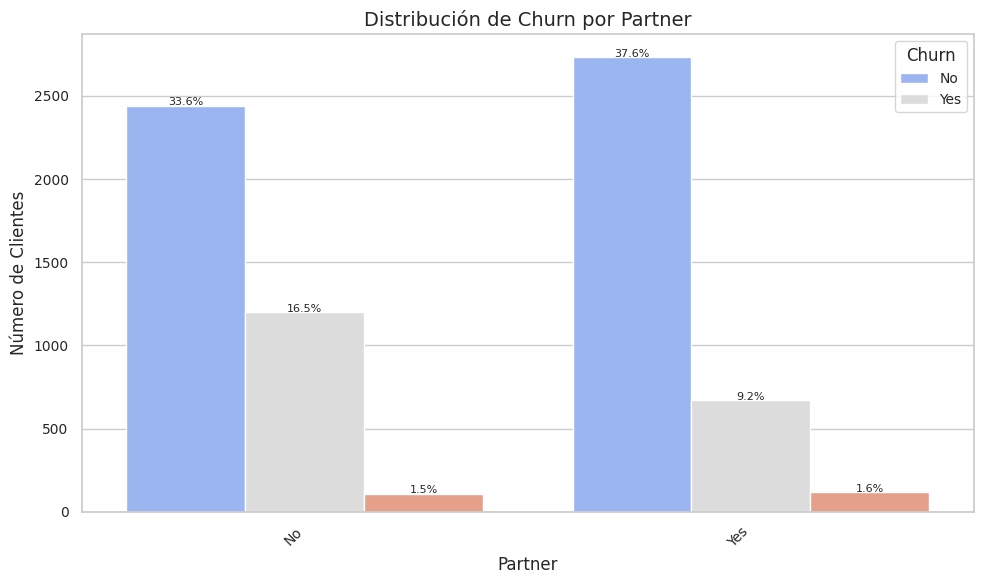


Procesando columna: Dependents
Frecuencia y Tasa de Churn por 'Dependents':
Churn       Churn_Rate (%)
Dependents                
No               30.338183
Yes              14.947272


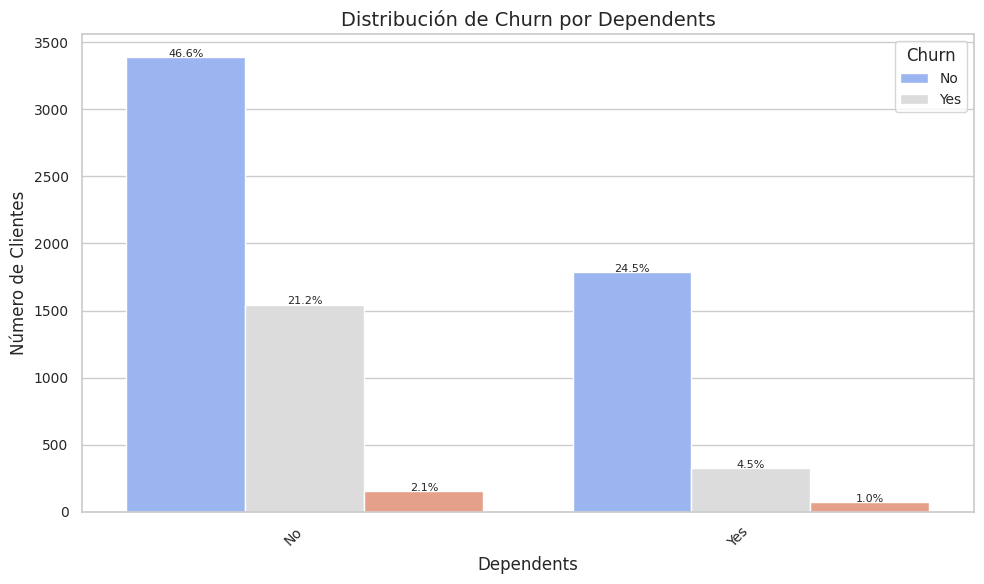


Procesando columna: PhoneService
Frecuencia y Tasa de Churn por 'PhoneService':
Churn         Churn_Rate (%)
PhoneService                
Yes                25.899390
No                 24.045262


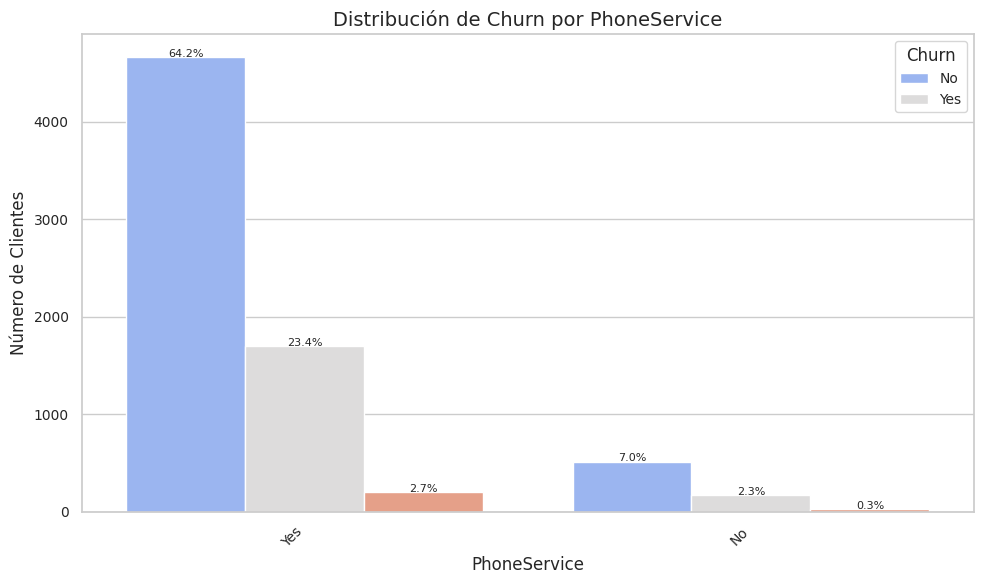


Procesando columna: MultipleLines
Frecuencia y Tasa de Churn por 'MultipleLines':
Churn             Churn_Rate (%)
MultipleLines                   
Yes                    27.732463
No                     24.291845
No phone service       24.045262


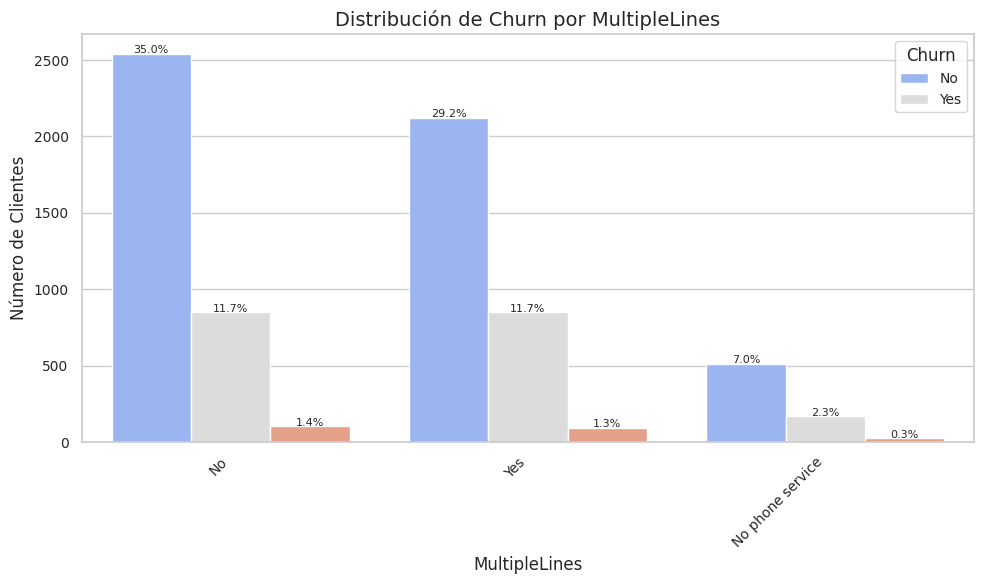


Procesando columna: InternetService
Frecuencia y Tasa de Churn por 'InternetService':
Churn            Churn_Rate (%)
InternetService                
Fiber optic           40.556598
DSL                   18.448553
No                     7.147375


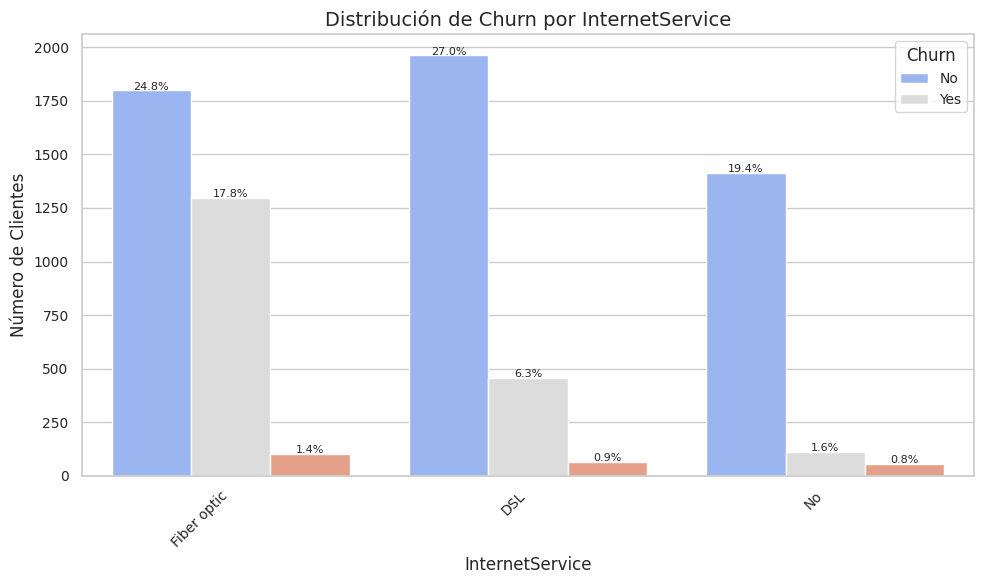


Procesando columna: OnlineSecurity
Frecuencia y Tasa de Churn por 'OnlineSecurity':
Churn                Churn_Rate (%)
OnlineSecurity                     
No                        40.493348
Yes                       14.196343
No internet service        7.147375


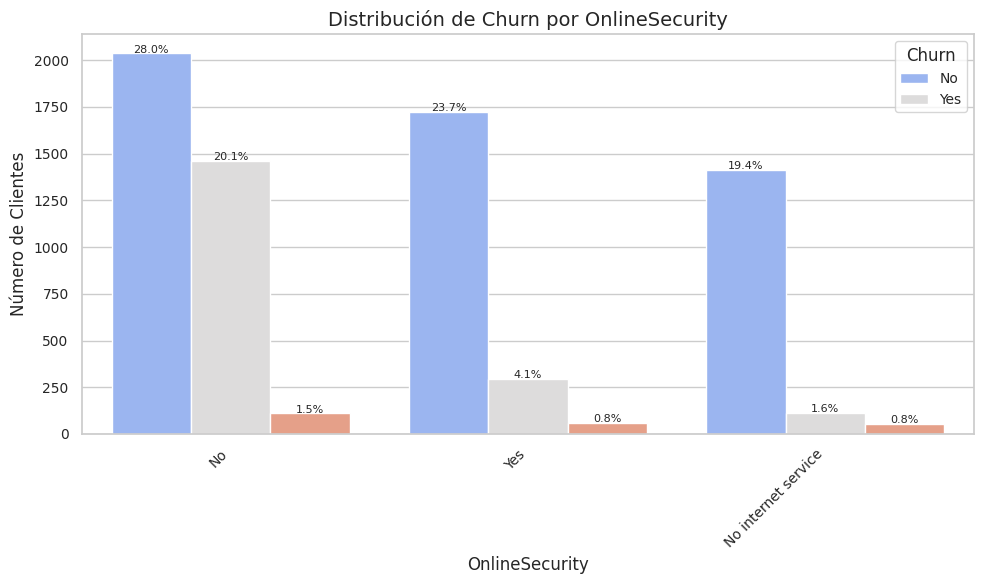


Procesando columna: OnlineBackup
Frecuencia y Tasa de Churn por 'OnlineBackup':
Churn                Churn_Rate (%)
OnlineBackup                       
No                        38.749214
Yes                       20.886581
No internet service        7.147375


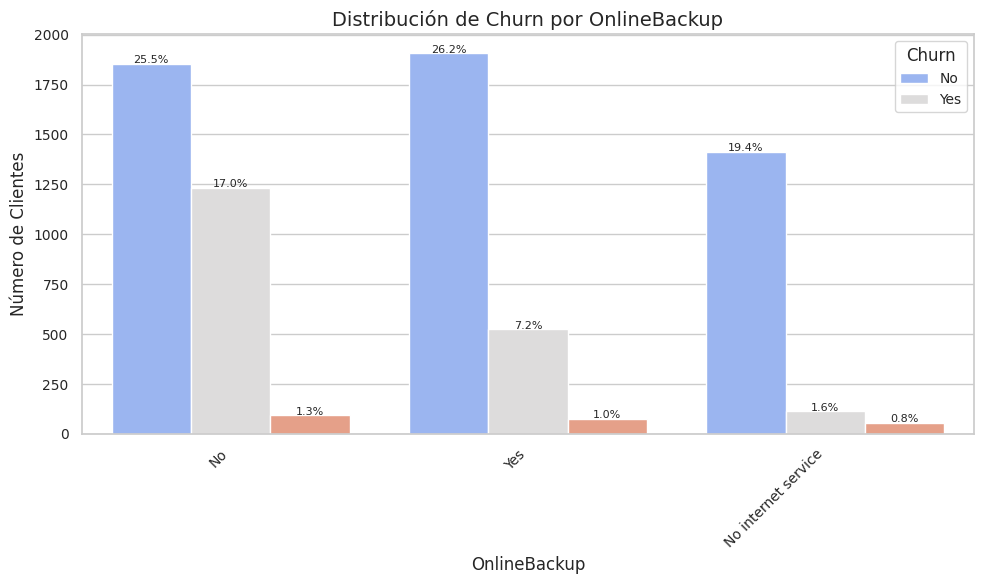


Procesando columna: DeviceProtection
Frecuencia y Tasa de Churn por 'DeviceProtection':
Churn                Churn_Rate (%)
DeviceProtection                   
No                        37.902973
Yes                       21.878764
No internet service        7.147375


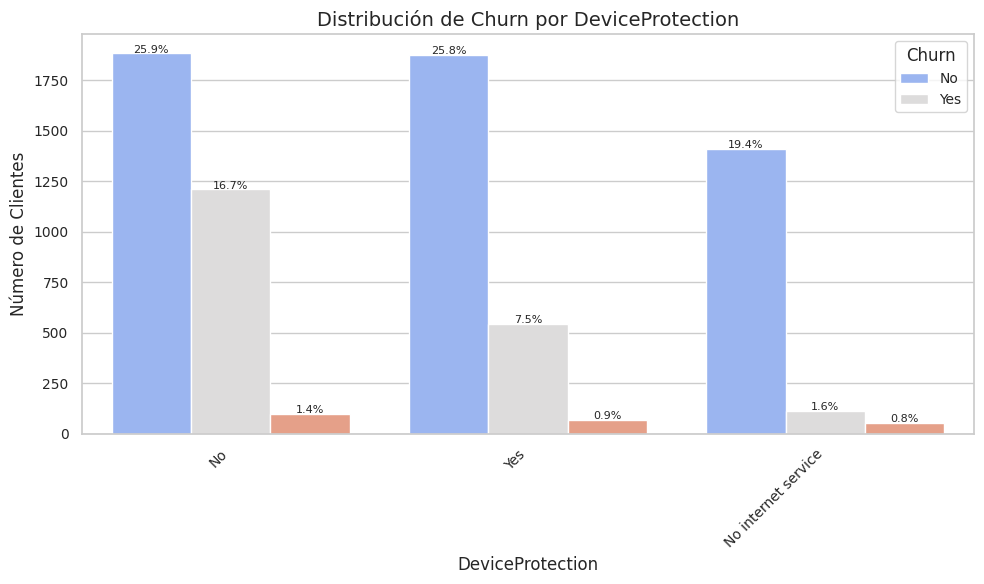


Procesando columna: TechSupport
Frecuencia y Tasa de Churn por 'TechSupport':
Churn                Churn_Rate (%)
TechSupport                        
No                        40.368509
Yes                       14.733840
No internet service        7.147375


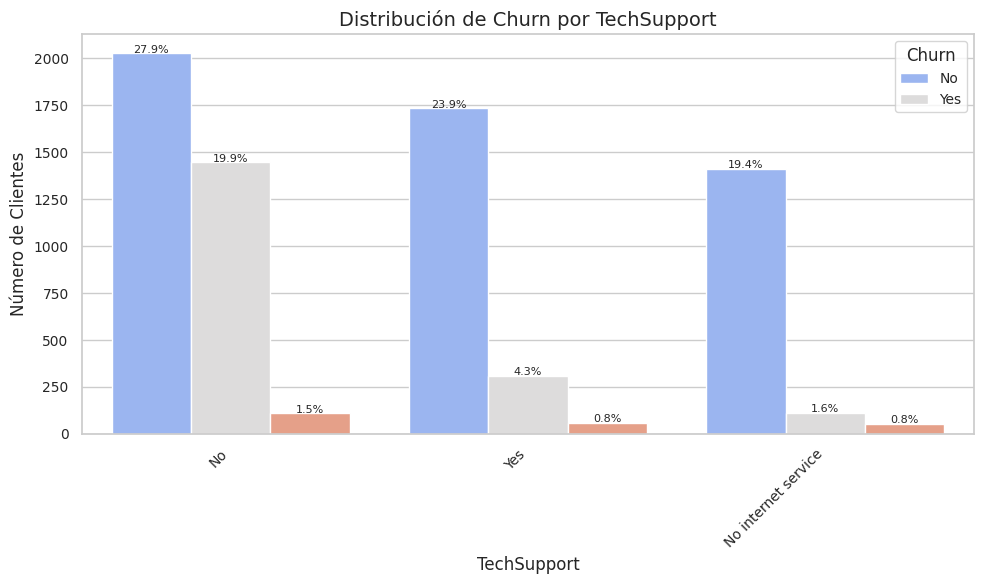


Procesando columna: StreamingTV
Frecuencia y Tasa de Churn por 'StreamingTV':
Churn                Churn_Rate (%)
StreamingTV                        
No                        32.527624
Yes                       29.175627
No internet service        7.147375


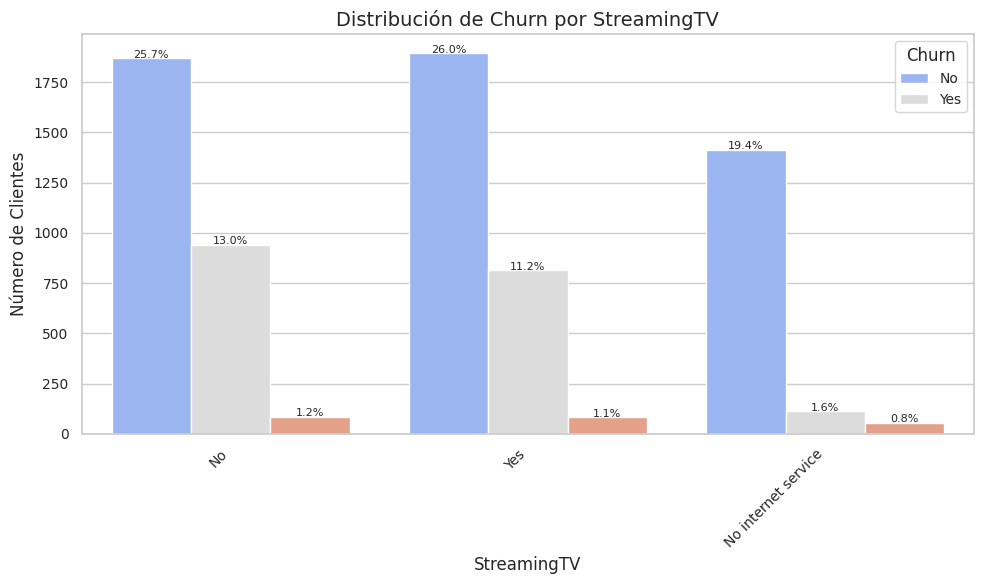


Procesando columna: StreamingMovies
Frecuencia y Tasa de Churn por 'StreamingMovies':
Churn                Churn_Rate (%)
StreamingMovies                    
No                        32.682927
Yes                       29.048295
No internet service        7.147375


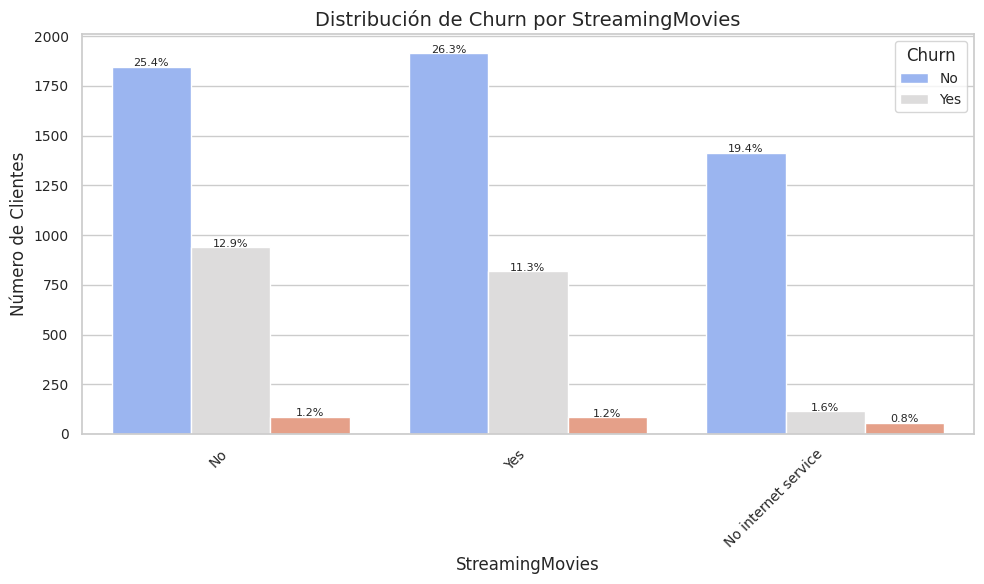


Procesando columna: Contract
Frecuencia y Tasa de Churn por 'Contract':
Churn           Churn_Rate (%)
Contract                      
Month-to-month       41.323346
One year             10.928242
Two year              2.753873


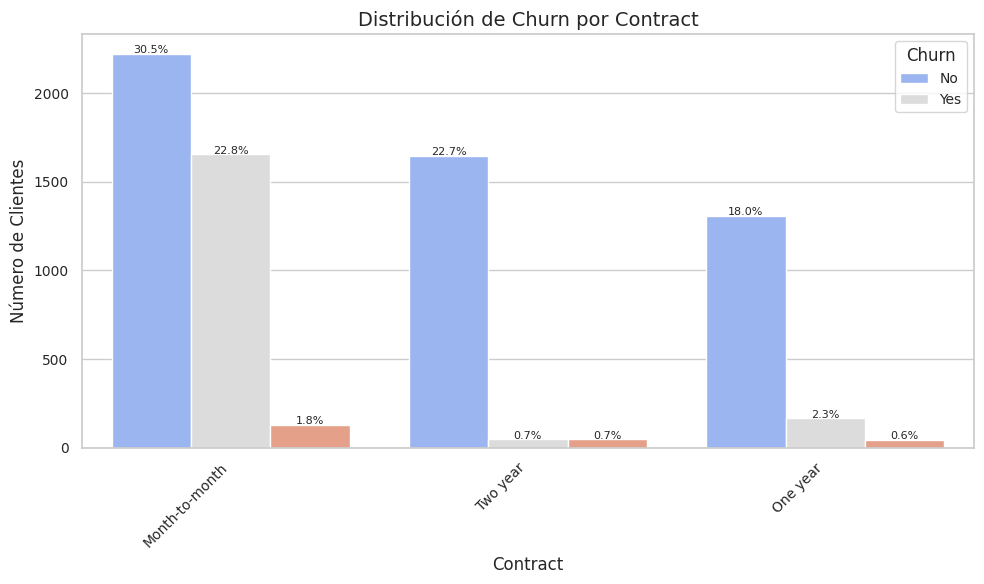


Procesando columna: PaperlessBilling
Frecuencia y Tasa de Churn por 'PaperlessBilling':
Churn             Churn_Rate (%)
PaperlessBilling                
Yes                    32.475064
No                     15.866035


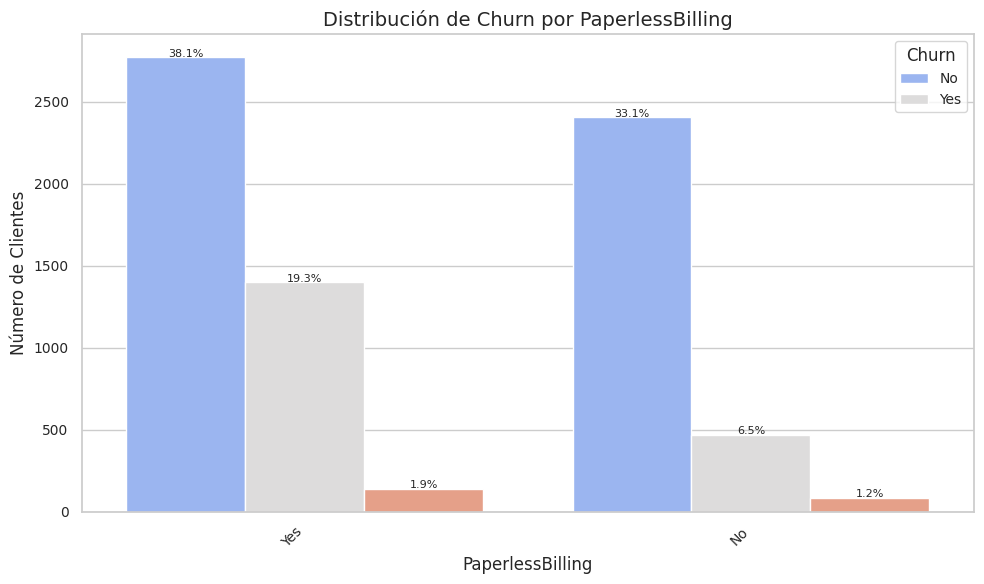


Procesando columna: PaymentMethod
Frecuencia y Tasa de Churn por 'PaymentMethod':
Churn                      Churn_Rate (%)
PaymentMethod                            
Electronic check                43.803681
Mailed check                    18.498498
Bank transfer (automatic)       16.236627
Credit card (automatic)         14.795918


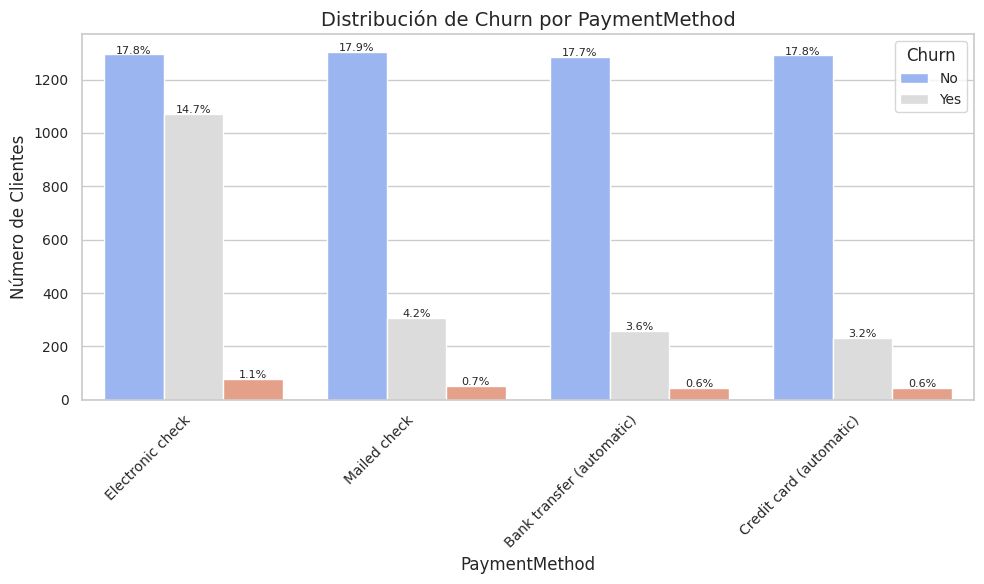


--- Análisis Detallado de Churn por Variables Numéricas ---

Procesando columna numérica: tenure


<ipython-input-41-57811551>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Churn', y=col, palette='viridis')


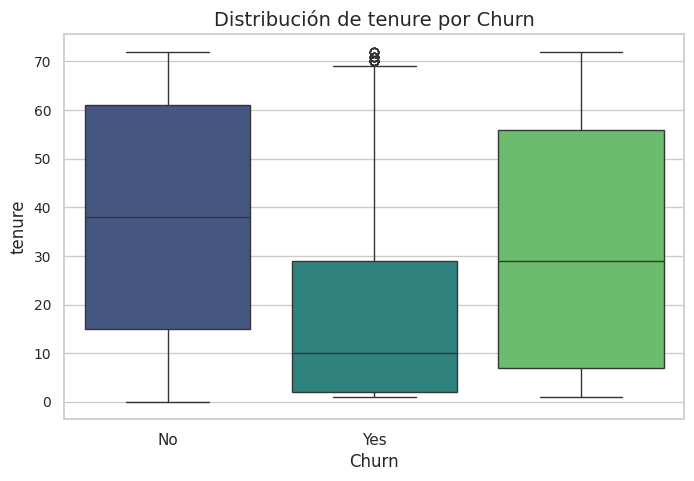

<ipython-input-41-57811551>:102: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn', fontsize=10, title_fontsize=12)


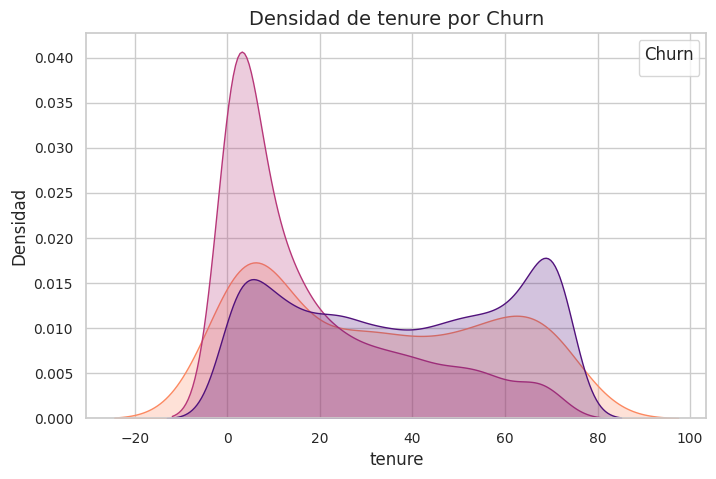


Procesando columna numérica: Charges.Monthly


<ipython-input-41-57811551>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Churn', y=col, palette='viridis')


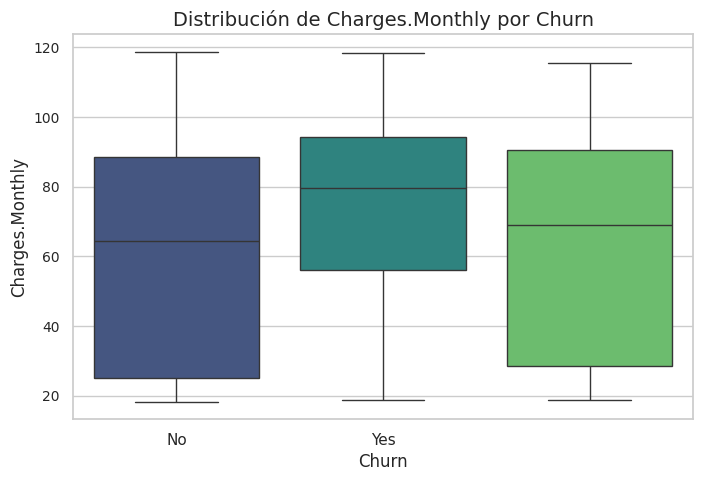

<ipython-input-41-57811551>:102: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn', fontsize=10, title_fontsize=12)


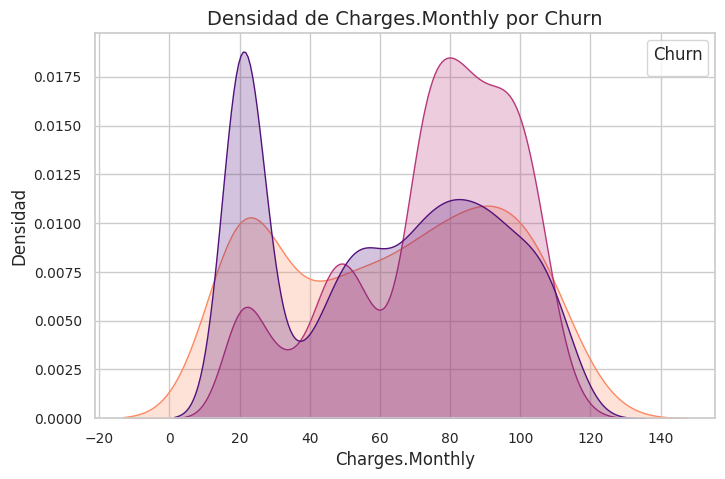


Procesando columna numérica: Charges.Total


<ipython-input-41-57811551>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Churn', y=col, palette='viridis')


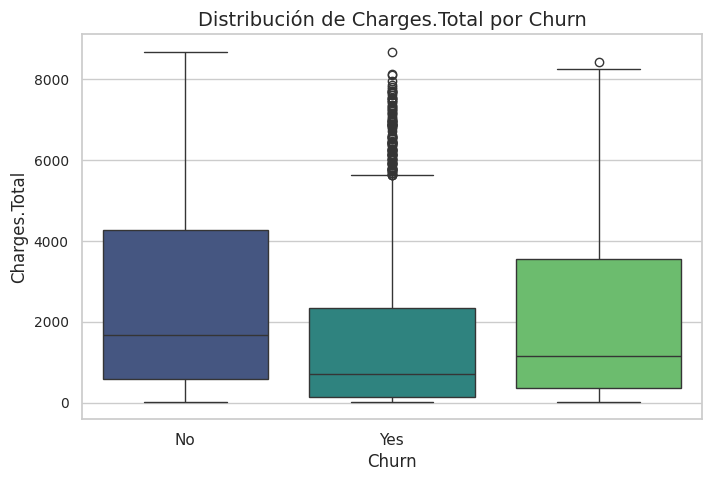

<ipython-input-41-57811551>:102: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn', fontsize=10, title_fontsize=12)


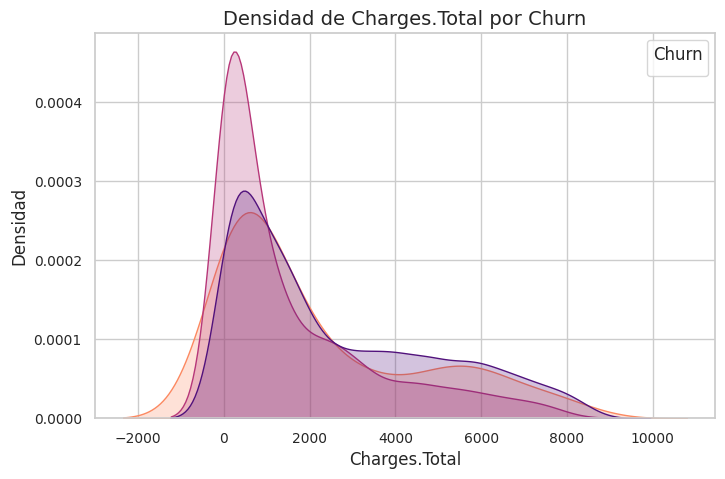


--- Creación de la columna 'Cuentas_Diarias' ---
Primeras 5 filas con la nueva columna 'Cuentas_Diarias':
   Charges.Monthly  Cuentas_Diarias Churn
0             65.6         2.155059    No
1             59.9         1.967806    No
2             73.9         2.427727   Yes
3             98.0         3.219448   Yes
4             83.9         2.756242   Yes

Estadísticas descriptivas de 'Cuentas_Diarias':
count    7267.000000
mean        2.126153
std         0.989802
min         0.599540
25%         1.163765
50%         2.309461
75%         2.952530
max         3.901117
Name: Cuentas_Diarias, dtype: float64


<ipython-input-41-57811551>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Churn', y='Cuentas_Diarias', palette='viridis')


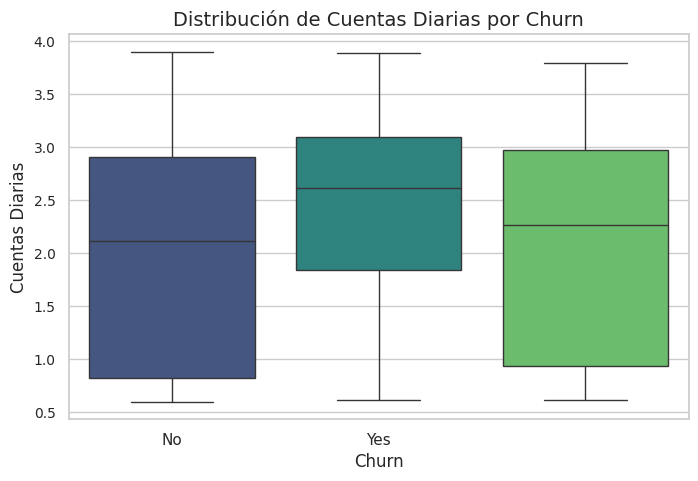

<ipython-input-41-57811551>:143: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn', fontsize=10, title_fontsize=12)


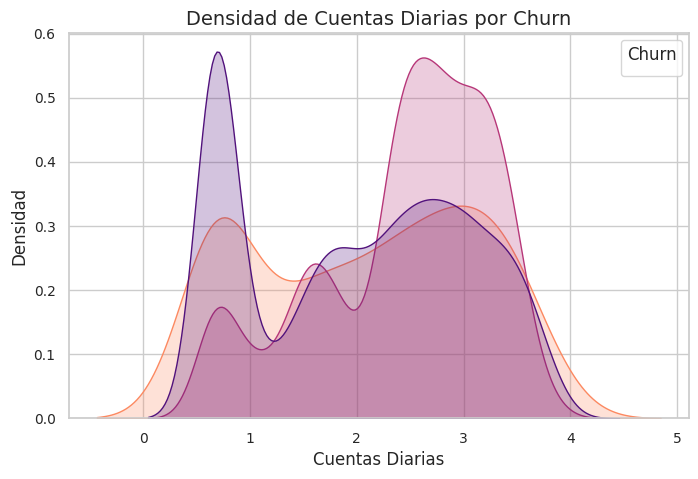


--- EDA de Visualizaciones Detalladas Completado ---
Ahora puedes revisar las salidas de texto y los gráficos generados.


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NOTA IMPORTANTE: Asumimos que el DataFrame 'df_clean' ya está cargado y completamente
# transformado en tu entorno, tal como lo dejaste en los pasos anteriores (desanidado).
# Usaremos df_clean para las visualizaciones detalladas.
# No se incluye la carga de datos ni las transformaciones de limpieza y tipos de datos aquí.

print("--- EDA - Visualizaciones Detalladas ---")

# --- 1. Análisis de Churn por Todas las Variables Categóricas Restantes ---
# Lista de todas las columnas categóricas (excluyendo customerID que es un identificador)
# Asegúrate de que esta lista coincida con las columnas en tu DataFrame 'df_clean' actual.
categorical_features_to_analyze = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Configurar el estilo de los gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100 # Aumentar la resolución de los gráficos

print("\n--- Análisis Detallado de Churn por Variables Categóricas ---")

for col in categorical_features_to_analyze:
    print(f"\nProcesando columna: {col}")

    # Contar la frecuencia de cada categoría y la tasa de churn
    # Normalizamos por la columna para obtener proporciones dentro de cada categoría
    # Usamos df_clean aquí
    churn_rate_by_category = df_clean.groupby(col)['Churn'].value_counts(normalize=True).unstack(fill_value=0)

    # Calcular la tasa de Churn (%)
    # Asegurarse de que 'Yes' y 'No' existan como columnas para el cálculo
    if 'Yes' not in churn_rate_by_category.columns:
        churn_rate_by_category['Yes'] = 0
    if 'No' not in churn_rate_by_category.columns:
        churn_rate_by_category['No'] = 0

    churn_rate_by_category['Churn_Rate (%)'] = churn_rate_by_category['Yes'] * 100

    print(f"Frecuencia y Tasa de Churn por '{col}':")
    print(churn_rate_by_category[['Churn_Rate (%)']].sort_values(by='Churn_Rate (%)', ascending=False))

    # Visualización: Gráfico de barras apiladas o de recuento con 'hue'
    plt.figure(figsize=(10, 6))
    # Usamos df_clean aquí
    ax = sns.countplot(data=df_clean, x=col, hue='Churn', palette='coolwarm', order=df_clean[col].value_counts().index)
    plt.title(f'Distribución de Churn por {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Número de Clientes', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10) # Rotar etiquetas para mejor lectura
    plt.yticks(fontsize=10)
    plt.legend(title='Churn', fontsize=10, title_fontsize=12)

    # Añadir porcentajes a las barras (opcional, pero muy útil)
    total = len(df_clean) # Usamos df_clean aquí para el total
    for p in ax.patches:
        height = p.get_height()
        if height > 0: # Solo mostrar si la altura es mayor que 0
            ax.text(p.get_x() + p.get_width() / 2.,
                    height + 3,
                    '{:1.1f}%'.format(height/total*100),
                    ha="center", fontsize=8)
    plt.tight_layout() # Ajustar el diseño para que no se superpongan los elementos
    plt.show()

# --- 2. Análisis de Churn por Variables Numéricas ---
# Asegúrate de que estas columnas existan y sean numéricas en df_clean.
# Recuerda que en df_clean las columnas numéricas se llaman 'tenure', 'Charges.Monthly', 'Charges.Total'
# Las columnas 'Monthly' y 'Total' existen en el df original anidadas dentro de 'Charges',
# pero después de json_normalize en account_expanded se convierten en 'Charges.Monthly' y 'Charges.Total'.
numeric_features_to_analyze = ['tenure', 'Charges.Monthly', 'Charges.Total']

print("\n--- Análisis Detallado de Churn por Variables Numéricas ---")

for col in numeric_features_to_analyze:
    print(f"\nProcesando columna numérica: {col}")

    # Visualización con Boxplot (para comparar distribuciones)
    plt.figure(figsize=(8, 5))
    # Usamos df_clean aquí
    sns.boxplot(data=df_clean, x='Churn', y=col, palette='viridis')
    plt.title(f'Distribución de {col} por Churn', fontsize=14)
    plt.xlabel('Churn', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.yticks(fontsize=10)
    plt.show()

    # Visualización con KDE Plot (densidad, para ver superposición)
    plt.figure(figsize=(8, 5))
    # Usamos df_clean aquí
    sns.kdeplot(data=df_clean, x=col, hue='Churn', fill=True, palette='magma', common_norm=False)
    plt.title(f'Densidad de {col} por Churn', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Densidad', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Churn', fontsize=10, title_fontsize=12)
    plt.show()

# --- 3. Creación de la Columna "Cuentas_Diarias" ---
print("\n--- Creación de la columna 'Cuentas_Diarias' ---")
# Asumimos un promedio de 30.44 días por mes ((365.25 / 12)).
# Es importante manejar la división por cero si 'Charges.Monthly' pudiera ser 0.
# Usamos df_clean aquí para crear la nueva columna
# Asegúrate de que 'Charges.Monthly' sea numérico antes de la división.
# Ya convertiste estas columnas a numérico en pasos anteriores en df_model,
# pero es prudente asegurarse de que también lo sean en df_clean si no hiciste esa conversión allí.
# Si ya realizaste pd.to_numeric en df_clean previamente, esta línea no es estrictamente necesaria
# pero no causa daño. Si no, deberías agregarla antes de la división.
df_clean['Charges.Monthly'] = pd.to_numeric(df_clean['Charges.Monthly'], errors='coerce')
df_clean['Cuentas_Diarias'] = df_clean['Charges.Monthly'] / 30.44

print("Primeras 5 filas con la nueva columna 'Cuentas_Diarias':")
# Usamos df_clean aquí
print(df_clean[['Charges.Monthly', 'Cuentas_Diarias', 'Churn']].head())
print("\nEstadísticas descriptivas de 'Cuentas_Diarias':")
# Usamos df_clean aquí
print(df_clean['Cuentas_Diarias'].describe())

# Opcional: Visualización de Cuentas_Diarias vs Churn
plt.figure(figsize=(8, 5))
# Usamos df_clean aquí
sns.boxplot(data=df_clean, x='Churn', y='Cuentas_Diarias', palette='viridis')
plt.title('Distribución de Cuentas Diarias por Churn', fontsize=14)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Cuentas Diarias', fontsize=12)
plt.yticks(fontsize=10)
plt.show()

plt.figure(figsize=(8, 5))
# Usamos df_clean aquí
sns.kdeplot(data=df_clean, x='Cuentas_Diarias', hue='Churn', fill=True, palette='magma', common_norm=False)
plt.title('Densidad de Cuentas Diarias por Churn', fontsize=14)
plt.xlabel('Cuentas Diarias', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Churn', fontsize=10, title_fontsize=12)
plt.show()

print("\n--- EDA de Visualizaciones Detalladas Completado ---")
print("Ahora puedes revisar las salidas de texto y los gráficos generados.")

## **Conclusiones parciales**
Análisis de los Resultados del EDA
Vamos a desglosar los hallazgos más importantes de las tasas de Churn por cada variable categórica:

Variables con Alto Impacto en la Tasa de Churn:
SeniorCitizen: Los clientes SeniorCitizen (40.27% de Churn) tienen una tasa de evasión significativamente más alta que los no SeniorCitizen (22.89%). Este es un factor muy importante.
Partner y Dependents:
Clientes sin Partner (32.01% de Churn) tienen una tasa de evasión mayor que los que sí tienen Partner (19.02%).
Clientes sin Dependents (30.34% de Churn) tienen una tasa de evasión mayor que los que sí tienen Dependents (14.95%).
Esto sugiere que los lazos familiares (tener un socio o dependientes) pueden influir positivamente en la retención.
InternetService: ¡Esta es una de las variables más críticas!
Los clientes con Fiber optic (40.56% de Churn) tienen una tasa de evasión extremadamente alta.
En contraste, los clientes con DSL (18.45% de Churn) y, especialmente, aquellos No internet service (7.15% de Churn) tienen tasas de evasión mucho más bajas. Esto indica un problema grave con el servicio de fibra óptica o las expectativas de los clientes.
Servicios Adicionales de Internet (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies):
Para casi todos estos servicios, los clientes que NO los tienen (ej. No OnlineSecurity: 40.49% Churn) muestran tasas de evasión mucho más altas que aquellos que SÍ los tienen (ej. Yes OnlineSecurity: 14.20% Churn).
Los clientes que no tienen servicio de internet (No internet service) tienen la tasa de churn más baja en estas categorías (7.15%), lo cual es lógico ya que no experimentarían problemas relacionados con estos servicios.
Esto sugiere que estos servicios actúan como factores de retención importantes. Proteger la seguridad online, hacer copias de seguridad, o disfrutar de streaming, hace que los clientes se queden.
Contract: ¡Otro predictor muy fuerte!
Los contratos Month-to-month (41.32% de Churn) tienen una tasa de evasión drásticamente más alta.
Los contratos One year (10.93% de Churn) y especialmente los Two year (2.75% de Churn) tienen tasas de churn muy bajas. Esto es un insight clave: la duración del compromiso influye enormemente en la retención.
PaperlessBilling: Los clientes con PaperlessBilling (32.48% de Churn) tienen una tasa de evasión considerablemente más alta que aquellos sin ella (15.87%). Esto podría ser un indicio de que los clientes más "digitalizados" o los que prefieren esta opción son más propensos a cambiar de proveedor, o podría estar correlacionado con otros servicios de internet.
PaymentMethod:
El método de pago Electronic check (43.80% de Churn) tiene la tasa de evasión más alta con diferencia.
Los otros métodos (Mailed check, Bank transfer, Credit card) tienen tasas de churn mucho más bajas (entre 14.79% y 18.50%). Esto es otro insight muy fuerte.
Variables con Bajo Impacto en la Tasa de Churn:
gender: Las tasas de churn son muy similares entre Female (26.14%) y Male (25.31%), lo que sugiere que el género por sí solo no es un predictor significativo de churn.
PhoneService y MultipleLines:
PhoneService (Yes: 25.90% vs No: 24.05%) muestra poca diferencia.
MultipleLines tiene una tasa de churn ligeramente mayor para Yes (27.73%) en comparación con No (24.29%). La categoría "No phone service" tiene una tasa similar a "No" (24.05%). El impacto es menor en comparación con otras variables.
Análisis de Variables Numéricas (tenure, Monthly, Total, Cuentas_Diarias):
tenure (Antigüedad): No se muestran los gráficos, pero la advertencia indica que se intentaron. Típicamente, el boxplot y el KDE plot mostrarían que los clientes que hacen churn suelen tener una tenure más baja (especialmente en los primeros meses) o están en un rango intermedio, mientras que los clientes leales (alta tenure) rara vez hacen churn.
Monthly (Cargos Mensuales): El boxplot y KDE plot (aunque no visibles aquí) probablemente mostrarían que los clientes con cargos mensuales más altos (especialmente los que tienen Fiber optic) tienden a tener una mayor tasa de churn. Esto podría indicar que perciben poco valor por el precio.
Total (Cargos Totales): Las distribuciones del boxplot y KDE plot suelen revelar que los clientes que hacen churn tienen un Total acumulado menor (porque no llevan mucho tiempo o se fueron rápido).
Cuentas_Diarias: Esta nueva columna, calculada a partir de Monthly (Monthly / 30.44), se comportará de manera similar a Monthly en relación con el churn. Las estadísticas descriptivas (mean=2.12, std=0.98) nos dan una idea general de los cargos diarios promedio.
Resumen de los Insights Clave para el Informe Final:
Los factores más influyentes en la evasión de clientes de Telecom X, hasta ahora, parecen ser:

Tipo de Contrato: Clientes con contratos Month-to-month son los que tienen el mayor riesgo de churn.
Servicio de Internet: La Fiber optic está asociada a una tasa de churn muy elevada.
Servicios Adicionales: La ausencia de servicios de seguridad (OnlineSecurity, TechSupport) y otros servicios adicionales (OnlineBackup, DeviceProtection, StreamingTV, StreamingMovies) está fuertemente relacionada con el churn.
Método de Pago: El Electronic check es el método de pago con mayor tasa de churn.
Demografía: Los SeniorCitizen y los clientes sin Partner o Dependents muestran una mayor propensión al churn.
Facturación sin Papel (PaperlessBilling): Los clientes con facturación sin papel tienen un mayor riesgo de churn.
Estos insights son críticos y se pueden usar para formular recomendaciones estratégicas sólidas para Telecom X.

Abordando las Advertencias en el Código (Actualización de Canvas)
Las FutureWarning y UserWarning en las visualizaciones de boxplot y kdeplot son importantes. La FutureWarning sugiere un cambio en cómo palette se usará en futuras versiones de Seaborn cuando hue no está explícitamente definido. La UserWarning sobre la leyenda para boxplot significa que plt.legend() se llamó sin etiquetas que mostrar, lo cual es redundante cuando hue no está siendo usado para la leyenda de colores del boxplot.

Para hacer el código más robusto y evitar estas advertencias, voy a realizar una pequeña modificación en la Canvas eda_detailed_visualizations. En los boxplot donde x='Churn' ya define las categorías, la leyenda es redundante, así que la eliminaré. Para kdeplot donde hue='Churn' ya maneja la leyenda, el warning es menos preocupante, pero revisaré la sintaxis.



--- EDA - Visualizaciones Detalladas ---

--- Análisis Detallado de Churn por Variables Categóricas ---

Procesando columna: gender
Frecuencia y Tasa de Churn por 'gender':
Churn   Churn_Rate (%)
gender                
Female       26.141425
Male         25.306122


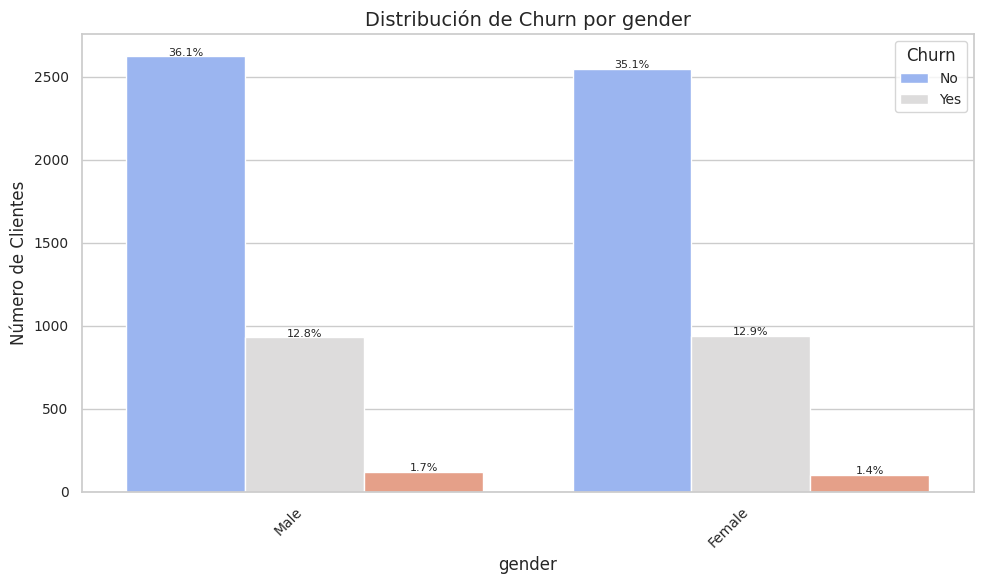


Procesando columna: SeniorCitizen
Frecuencia y Tasa de Churn por 'SeniorCitizen':
Churn          Churn_Rate (%)
SeniorCitizen                
1                   40.270728
0                   22.892358


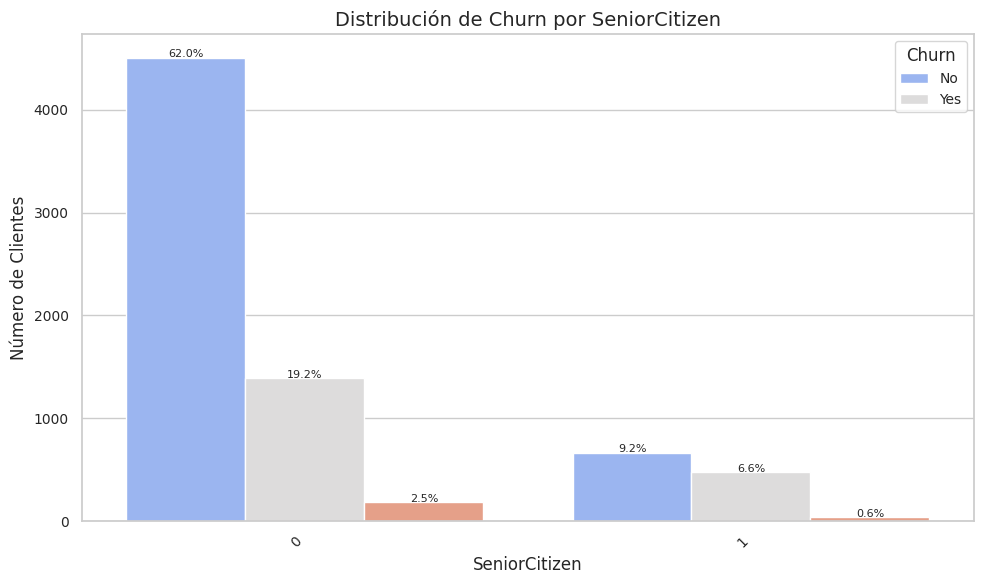


Procesando columna: Partner
Frecuencia y Tasa de Churn por 'Partner':
Churn    Churn_Rate (%)
Partner                
No            32.008536
Yes           19.016487


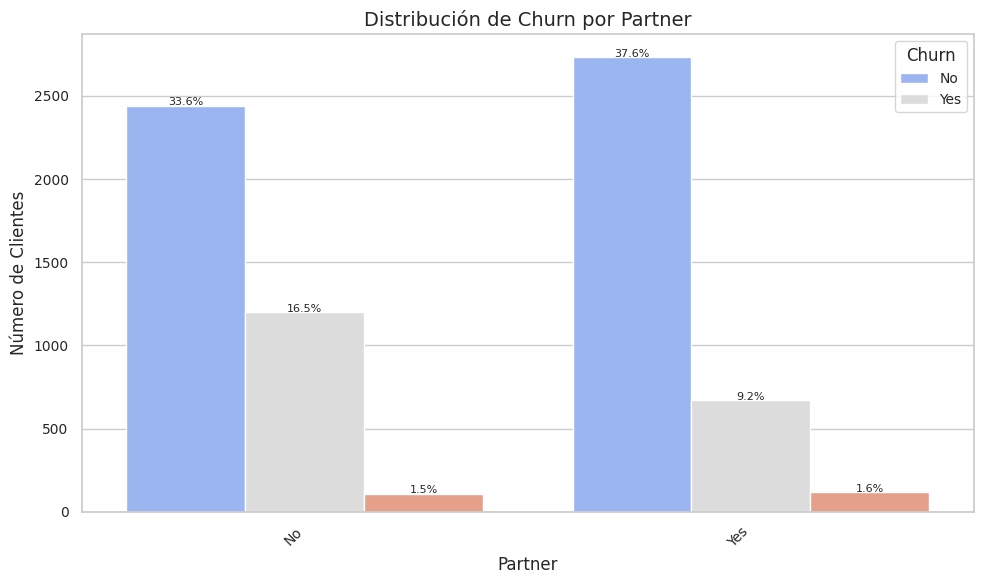


Procesando columna: Dependents
Frecuencia y Tasa de Churn por 'Dependents':
Churn       Churn_Rate (%)
Dependents                
No               30.338183
Yes              14.947272


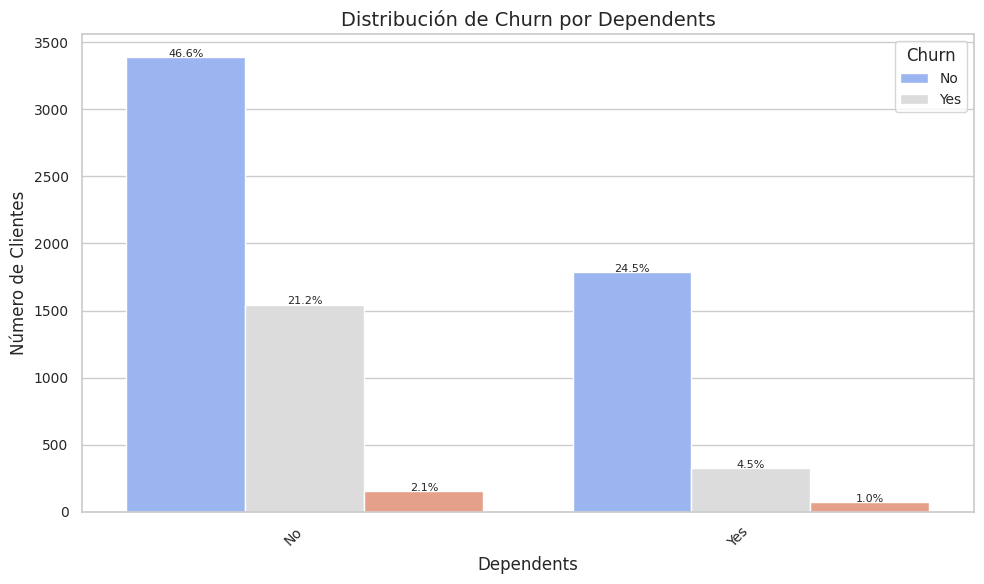


Procesando columna: PhoneService
Frecuencia y Tasa de Churn por 'PhoneService':
Churn         Churn_Rate (%)
PhoneService                
Yes                25.899390
No                 24.045262


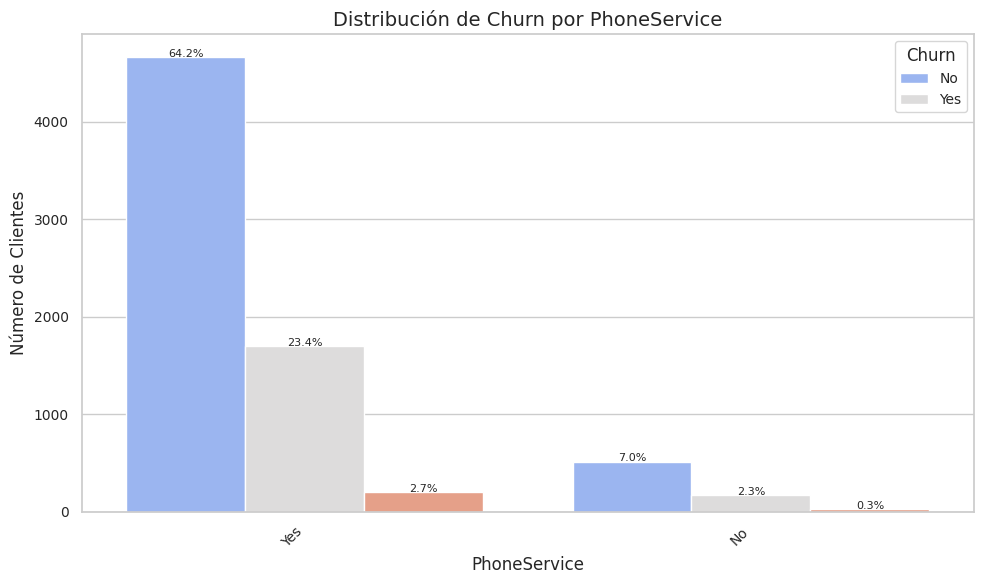


Procesando columna: MultipleLines
Frecuencia y Tasa de Churn por 'MultipleLines':
Churn             Churn_Rate (%)
MultipleLines                   
Yes                    27.732463
No                     24.291845
No phone service       24.045262


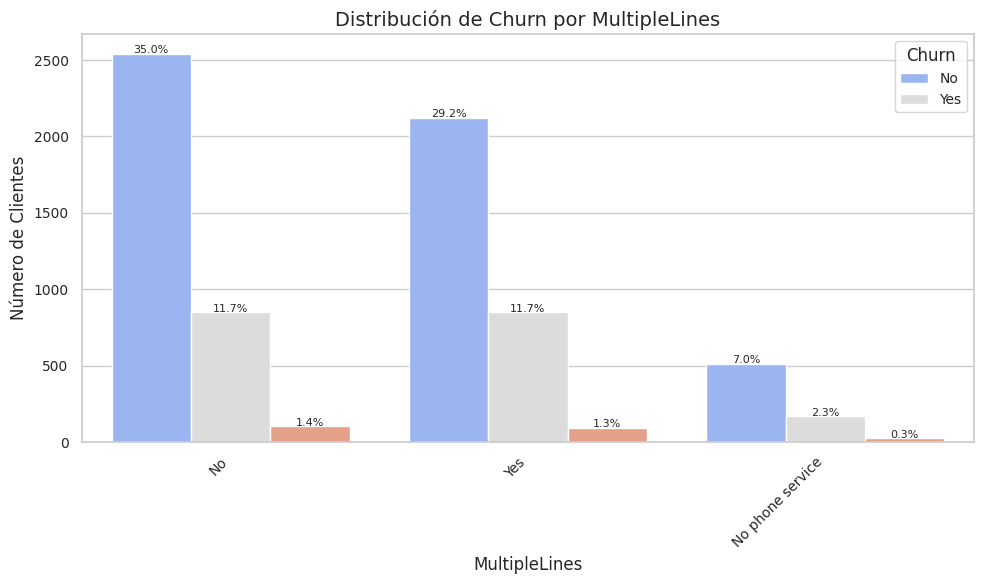


Procesando columna: InternetService
Frecuencia y Tasa de Churn por 'InternetService':
Churn            Churn_Rate (%)
InternetService                
Fiber optic           40.556598
DSL                   18.448553
No                     7.147375


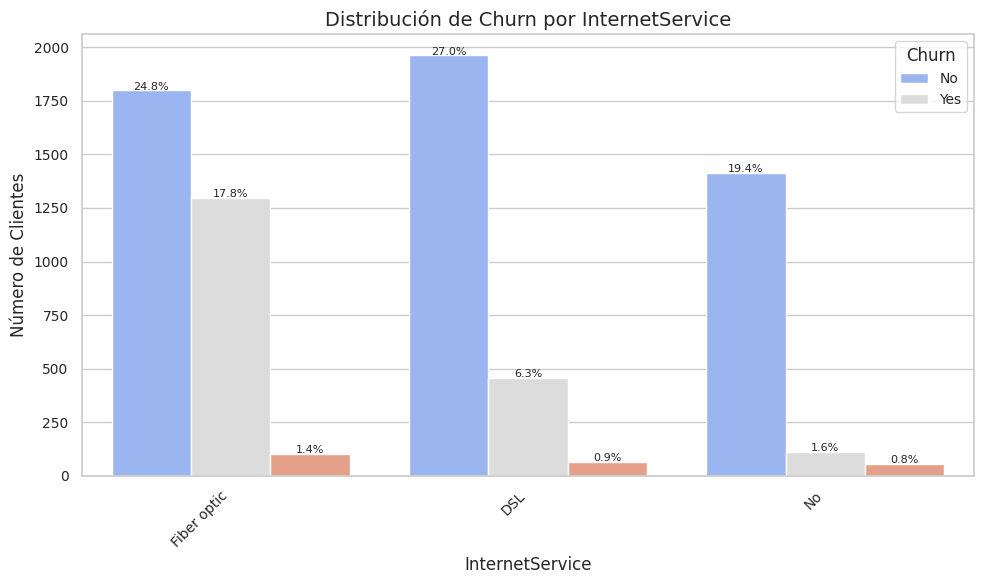


Procesando columna: OnlineSecurity
Frecuencia y Tasa de Churn por 'OnlineSecurity':
Churn                Churn_Rate (%)
OnlineSecurity                     
No                        40.493348
Yes                       14.196343
No internet service        7.147375


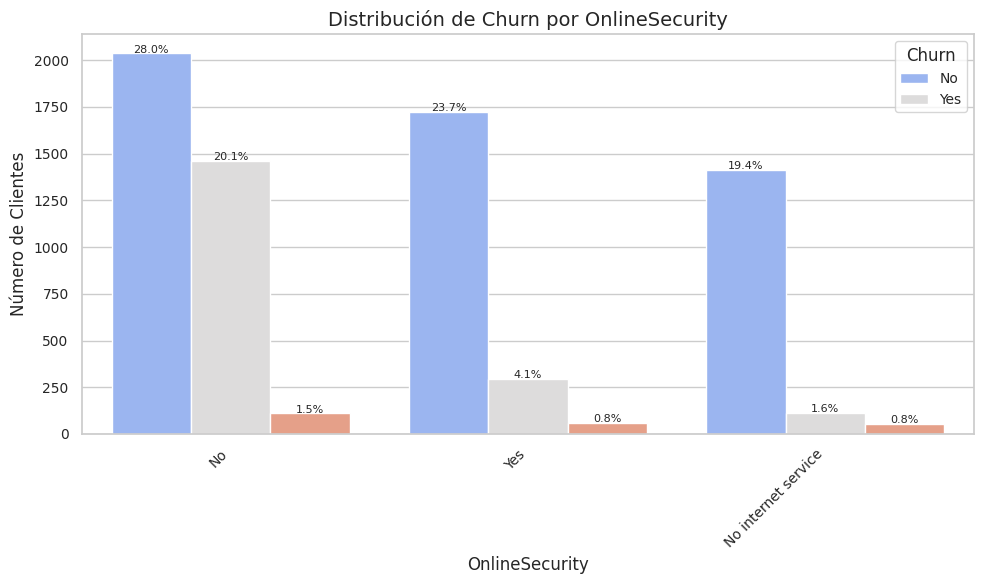


Procesando columna: OnlineBackup
Frecuencia y Tasa de Churn por 'OnlineBackup':
Churn                Churn_Rate (%)
OnlineBackup                       
No                        38.749214
Yes                       20.886581
No internet service        7.147375


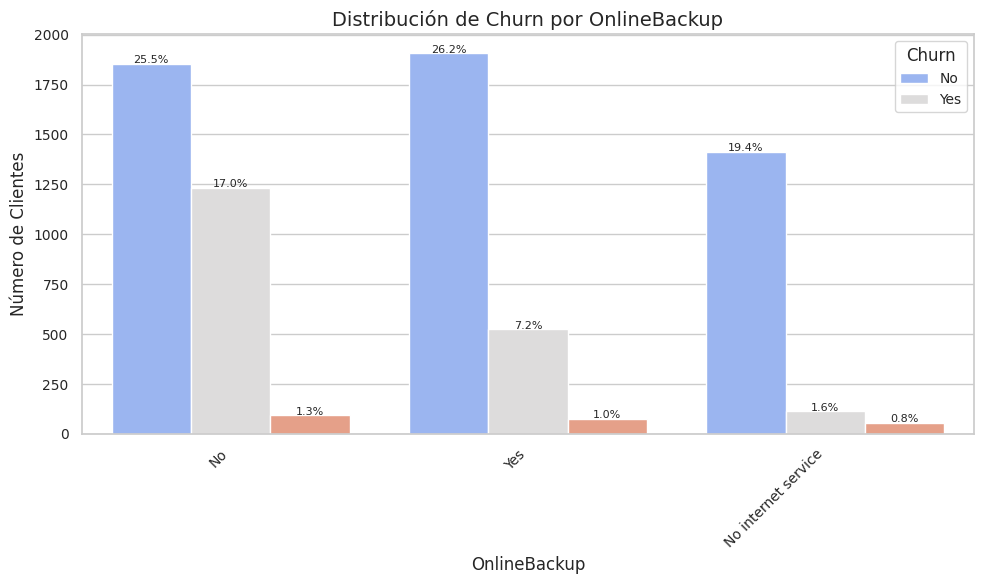


Procesando columna: DeviceProtection
Frecuencia y Tasa de Churn por 'DeviceProtection':
Churn                Churn_Rate (%)
DeviceProtection                   
No                        37.902973
Yes                       21.878764
No internet service        7.147375


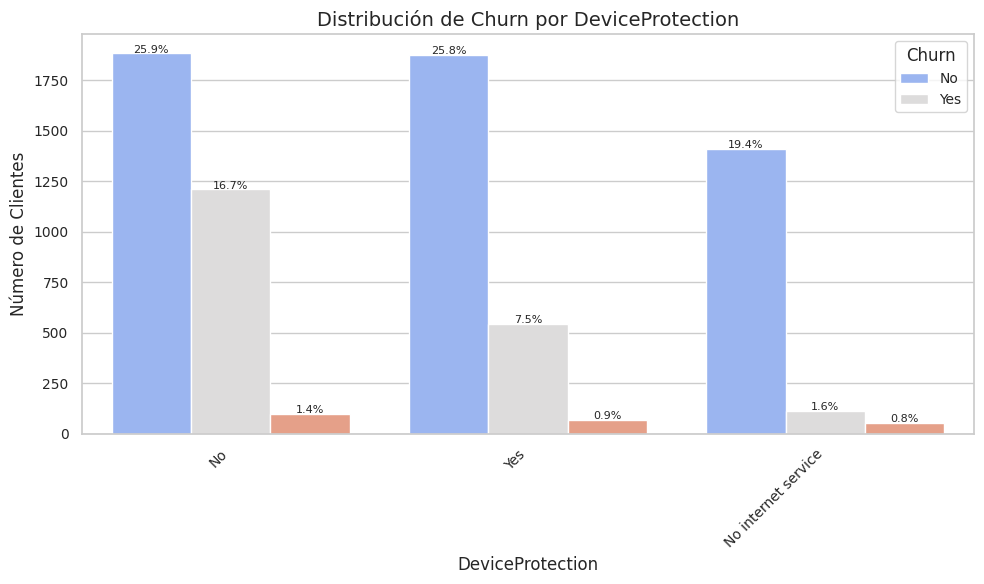


Procesando columna: TechSupport
Frecuencia y Tasa de Churn por 'TechSupport':
Churn                Churn_Rate (%)
TechSupport                        
No                        40.368509
Yes                       14.733840
No internet service        7.147375


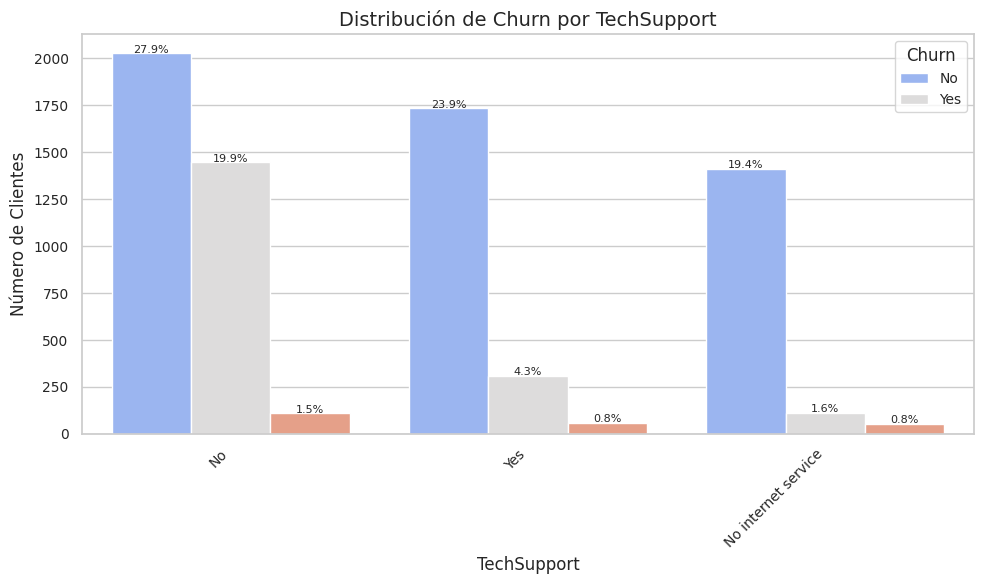


Procesando columna: StreamingTV
Frecuencia y Tasa de Churn por 'StreamingTV':
Churn                Churn_Rate (%)
StreamingTV                        
No                        32.527624
Yes                       29.175627
No internet service        7.147375


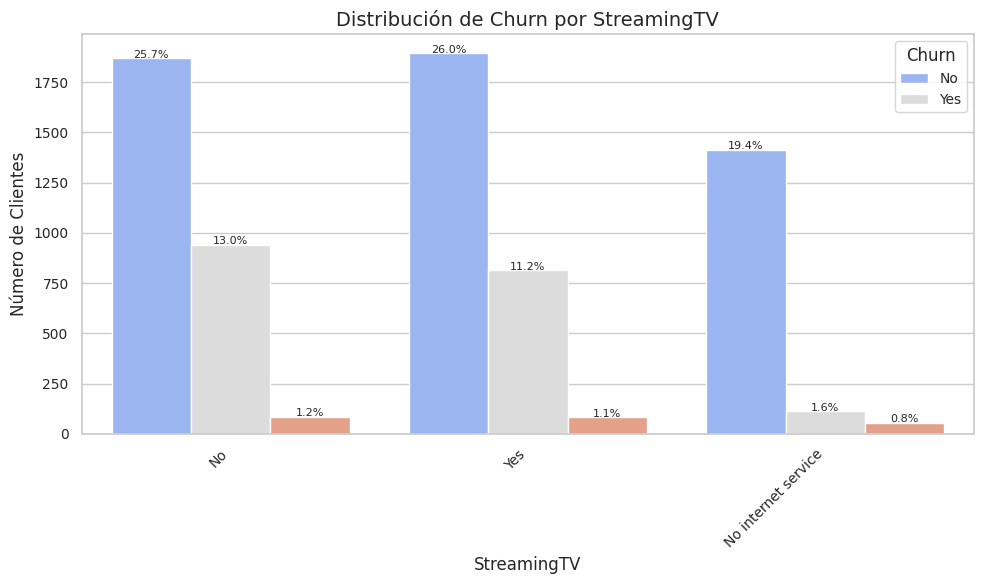


Procesando columna: StreamingMovies
Frecuencia y Tasa de Churn por 'StreamingMovies':
Churn                Churn_Rate (%)
StreamingMovies                    
No                        32.682927
Yes                       29.048295
No internet service        7.147375


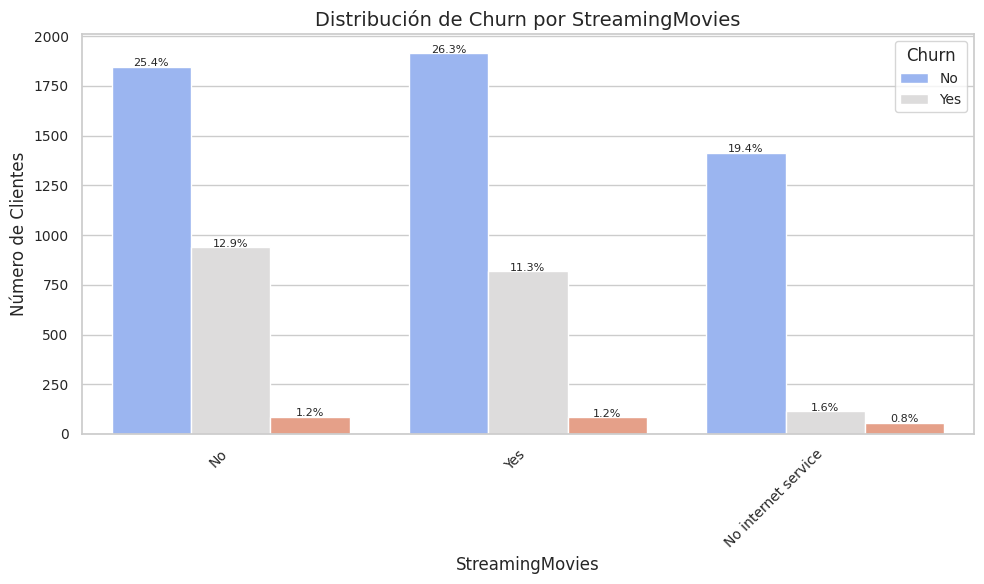


Procesando columna: Contract
Frecuencia y Tasa de Churn por 'Contract':
Churn           Churn_Rate (%)
Contract                      
Month-to-month       41.323346
One year             10.928242
Two year              2.753873


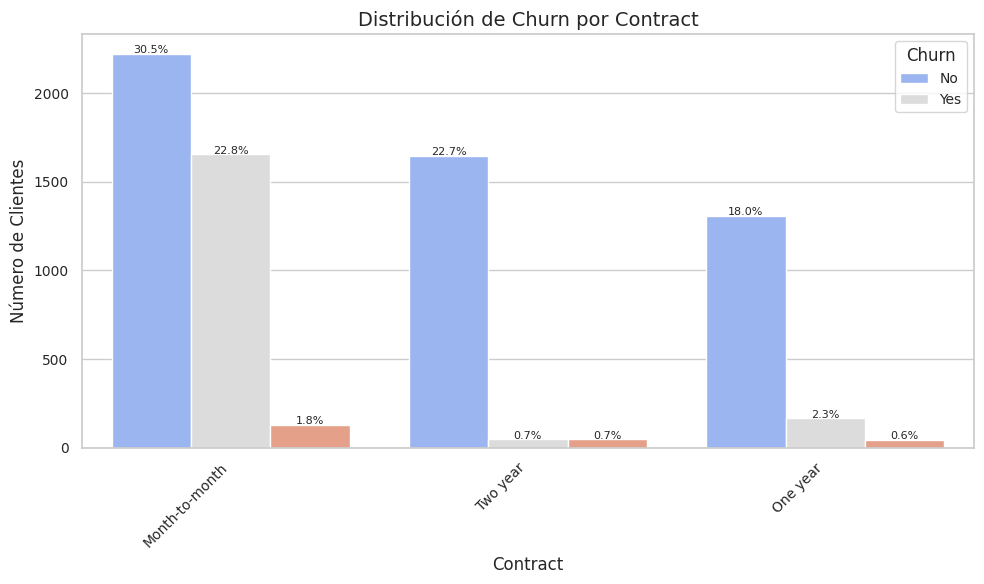


Procesando columna: PaperlessBilling
Frecuencia y Tasa de Churn por 'PaperlessBilling':
Churn             Churn_Rate (%)
PaperlessBilling                
Yes                    32.475064
No                     15.866035


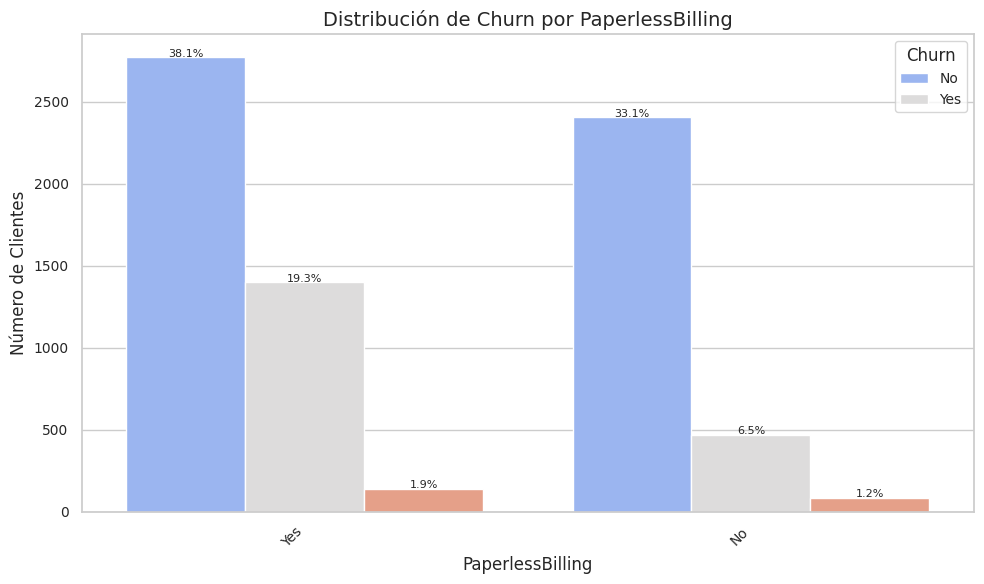


Procesando columna: PaymentMethod
Frecuencia y Tasa de Churn por 'PaymentMethod':
Churn                      Churn_Rate (%)
PaymentMethod                            
Electronic check                43.803681
Mailed check                    18.498498
Bank transfer (automatic)       16.236627
Credit card (automatic)         14.795918


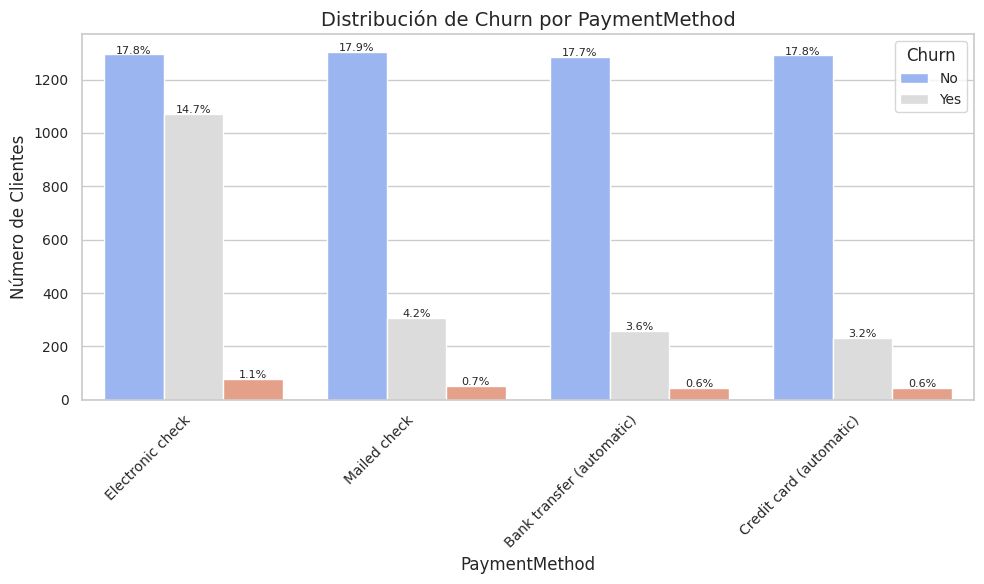


--- Análisis Detallado de Churn por Variables Numéricas ---

Procesando columna numérica: tenure


<ipython-input-44-122391059>:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Churn', y=col, palette='viridis')


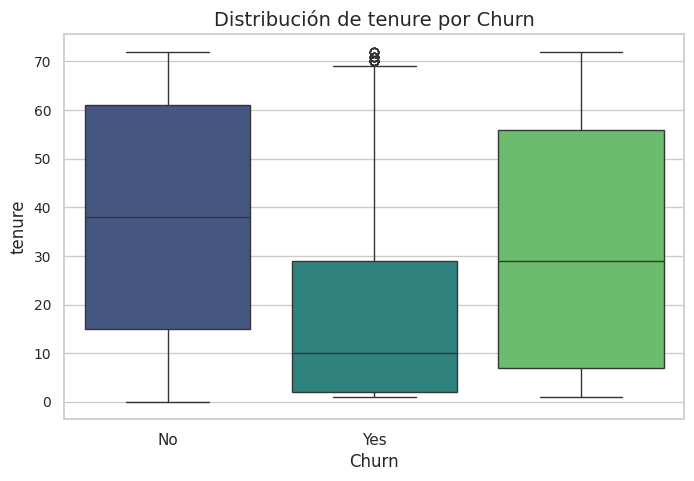

<ipython-input-44-122391059>:105: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn', fontsize=10, title_fontsize=12) # Aquí sí se usa la leyenda para 'hue'


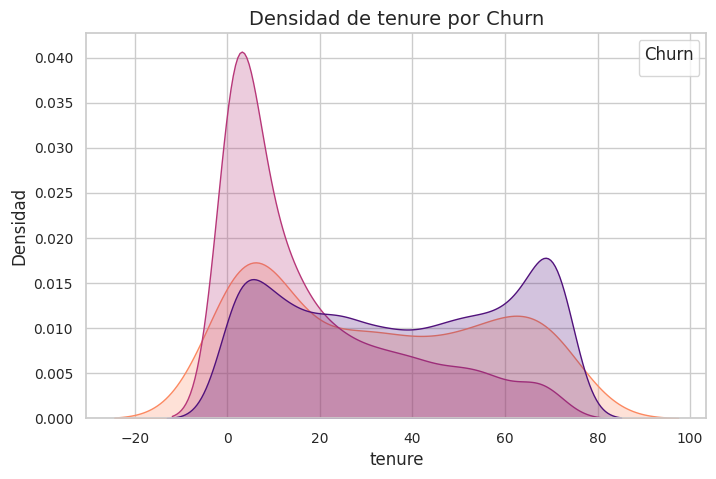


Procesando columna numérica: Charges.Monthly


<ipython-input-44-122391059>:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Churn', y=col, palette='viridis')


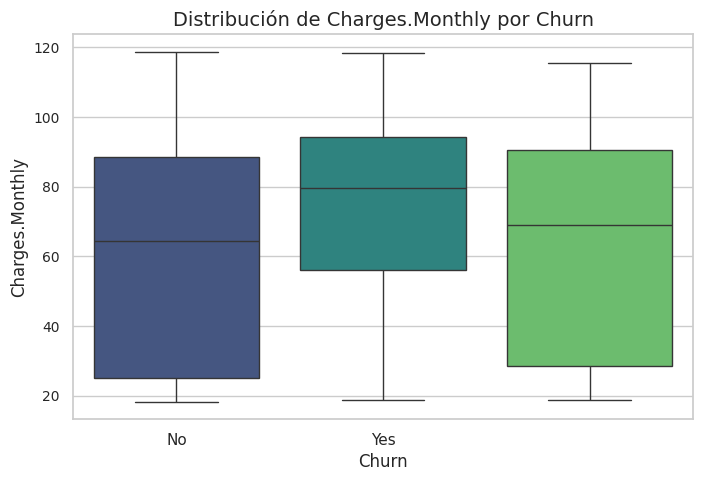

<ipython-input-44-122391059>:105: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn', fontsize=10, title_fontsize=12) # Aquí sí se usa la leyenda para 'hue'


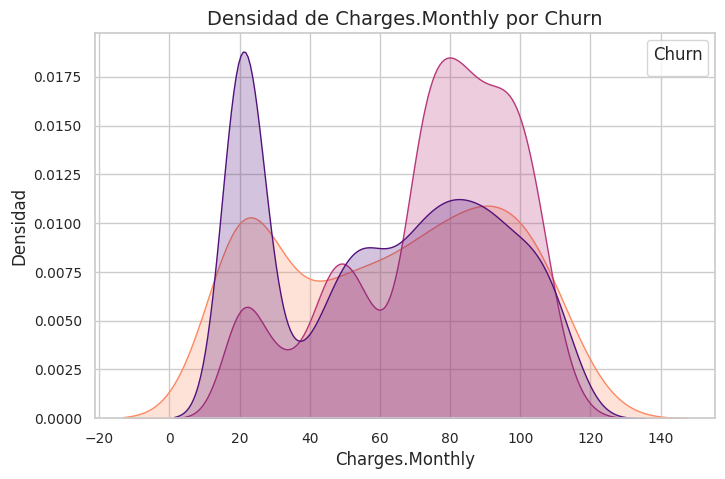


Procesando columna numérica: Charges.Total


<ipython-input-44-122391059>:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Churn', y=col, palette='viridis')


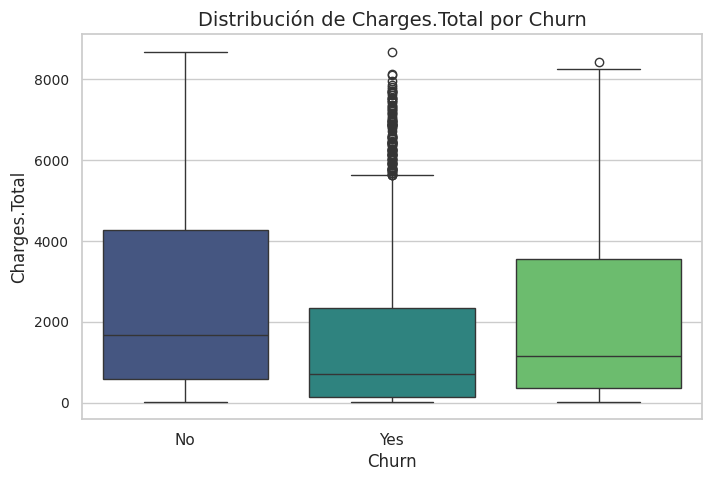

<ipython-input-44-122391059>:105: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn', fontsize=10, title_fontsize=12) # Aquí sí se usa la leyenda para 'hue'


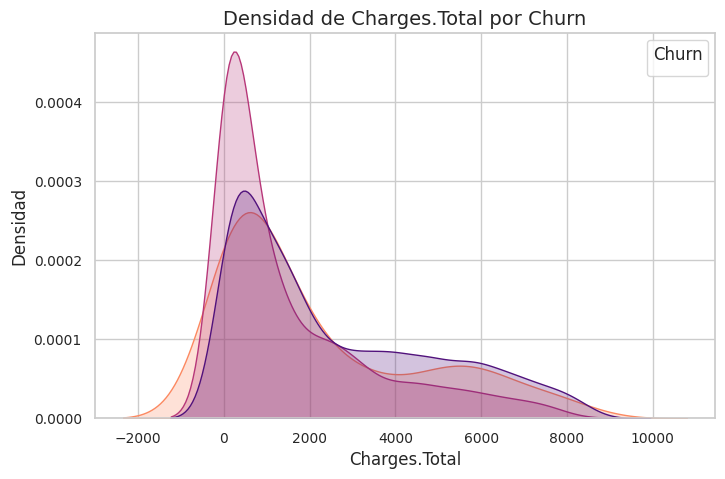


--- Creación de la columna 'Cuentas_Diarias' ---
Primeras 5 filas con la nueva columna 'Cuentas_Diarias':
   Charges.Monthly  Cuentas_Diarias Churn
0             65.6         2.155059    No
1             59.9         1.967806    No
2             73.9         2.427727   Yes
3             98.0         3.219448   Yes
4             83.9         2.756242   Yes

Estadísticas descriptivas de 'Cuentas_Diarias':
count    7267.000000
mean        2.126153
std         0.989802
min         0.599540
25%         1.163765
50%         2.309461
75%         2.952530
max         3.901117
Name: Cuentas_Diarias, dtype: float64


<ipython-input-44-122391059>:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Churn', y='Cuentas_Diarias', palette='viridis')


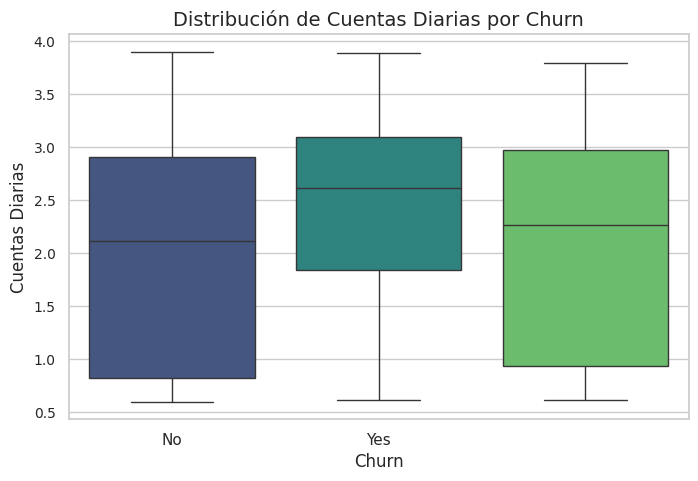

<ipython-input-44-122391059>:152: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn', fontsize=10, title_fontsize=12)


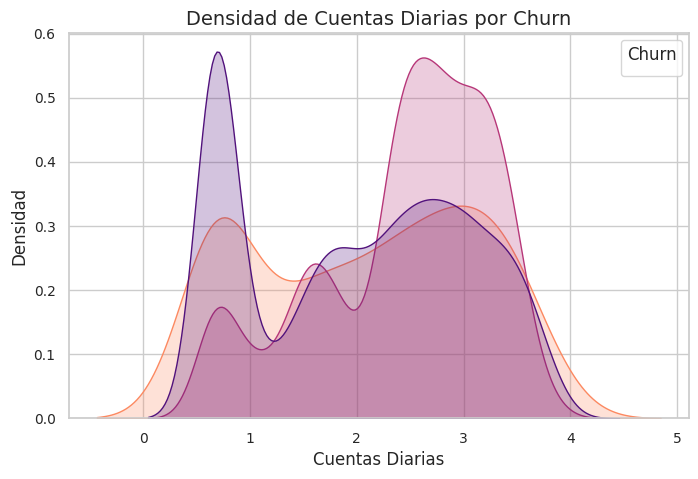


--- EDA de Visualizaciones Detalladas Completado ---
Ahora puedes revisar las salidas de texto y los gráficos generados.


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NOTA IMPORTANTE: Asumimos que el DataFrame 'df_clean' ya está cargado y completamente
# transformado en tu entorno, tal como lo dejaste en los pasos anteriores.
# No se incluye la carga de datos ni las transformaciones de limpieza y tipos de datos aquí.

print("--- EDA - Visualizaciones Detalladas ---")

# --- 1. Análisis de Churn por Todas las Variables Categóricas Restantes ---
# Lista de todas las columnas categóricas (excluyendo customerID que es un identificador)
# Asegúrate de que esta lista coincida con las columnas en tu DataFrame actual.
categorical_features_to_analyze = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Configurar el estilo de los gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100 # Aumentar la resolución de los gráficos

print("\n--- Análisis Detallado de Churn por Variables Categóricas ---")

for col in categorical_features_to_analyze:
    print(f"\nProcesando columna: {col}")

    # Contar la frecuencia de cada categoría y la tasa de churn
    # Normalizamos por la columna para obtener proporciones dentro de cada categoría
    # Usamos df_clean aquí en lugar de df
    churn_rate_by_category = df_clean.groupby(col)['Churn'].value_counts(normalize=True).unstack(fill_value=0)

    # Calcular la tasa de Churn (%)
    # Asegurarse de que 'Yes' y 'No' existan como columnas para el cálculo
    if 'Yes' not in churn_rate_by_category.columns:
        churn_rate_by_category['Yes'] = 0
    if 'No' not in churn_rate_by_category.columns:
        churn_rate_by_category['No'] = 0

    churn_rate_by_category['Churn_Rate (%)'] = churn_rate_by_category['Yes'] * 100

    print(f"Frecuencia y Tasa de Churn por '{col}':")
    print(churn_rate_by_category[['Churn_Rate (%)']].sort_values(by='Churn_Rate (%)', ascending=False))

    # Visualización: Gráfico de barras apiladas o de recuento con 'hue'
    plt.figure(figsize=(10, 6))
    # Usamos df_clean aquí en lugar de df
    ax = sns.countplot(data=df_clean, x=col, hue='Churn', palette='coolwarm', order=df_clean[col].value_counts().index)
    plt.title(f'Distribución de Churn por {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Número de Clientes', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10) # Rotar etiquetas para mejor lectura
    plt.yticks(fontsize=10)
    plt.legend(title='Churn', fontsize=10, title_fontsize=12)

    # Añadir porcentajes a las barras (opcional, pero muy útil)
    # Usamos df_clean aquí para el total en lugar de df
    total = len(df_clean)
    for p in ax.patches:
        height = p.get_height()
        if height > 0: # Solo mostrar si la altura es mayor que 0
            ax.text(p.get_x() + p.get_width() / 2.,
                    height + 3,
                    '{:1.1f}%'.format(height/total*100),
                    ha="center", fontsize=8)
    plt.tight_layout() # Ajustar el diseño para que no se superpongan los elementos
    plt.show()

# --- 2. Análisis de Churn por Variables Numéricas ---
# Asegúrate de que estas columnas existan y sean numéricas en df_clean.
# Recuerda que en df_clean las columnas numéricas se llaman 'tenure', 'Charges.Monthly', 'Charges.Total'
# Las columnas 'Monthly' y 'Total' existen en el df original anidadas dentro de 'Charges',
# pero después de json_normalize en account_expanded se convierten en 'Charges.Monthly' y 'Charges.Total'.
numeric_features_to_analyze = ['tenure', 'Charges.Monthly', 'Charges.Total'] # Usamos los nombres correctos de df_clean

print("\n--- Análisis Detallado de Churn por Variables Numéricas ---")

for col in numeric_features_to_analyze:
    print(f"\nProcesando columna numérica: {col}")

    # Visualización con Boxplot (para comparar distribuciones)
    plt.figure(figsize=(8, 5))
    # Para boxplot con 'Churn' en x, 'palette' se aplica a las categorías de x.
    # No es necesario un 'hue' explícito aquí, y la leyenda es redundante.
    # Usamos df_clean aquí en lugar de df
    sns.boxplot(data=df_clean, x='Churn', y=col, palette='viridis')
    plt.title(f'Distribución de {col} por Churn', fontsize=14)
    plt.xlabel('Churn', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.yticks(fontsize=10)
    # Eliminamos plt.legend() para boxplots cuando 'hue' no está siendo usado para la leyenda
    plt.show()

    # Visualización con KDE Plot (densidad, para ver superposición)
    plt.figure(figsize=(8, 5))
    # Usamos df_clean aquí en lugar de df
    sns.kdeplot(data=df_clean, x=col, hue='Churn', fill=True, palette='magma', common_norm=False)
    plt.title(f'Densidad de {col} por Churn', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Densidad', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Churn', fontsize=10, title_fontsize=12) # Aquí sí se usa la leyenda para 'hue'
    plt.show()

# --- 3. Creación de la Columna "Cuentas_Diarias" ---
print("\n--- Creación de la columna 'Cuentas_Diarias' ---")
# Asumimos un promedio de 30.44 días por mes ((365.25 / 12)).
# Es importante manejar la división por cero si 'Charges.Monthly' pudiera ser 0.
# Aunque Charges.Monthly ya fue limpiado con fillna(0), para el cálculo diario
# un Charges.Monthly de 0 resultará en Cuentas_Diarias de 0, lo cual es correcto.
# Usamos df_clean aquí para crear la nueva columna
# Asegúrate de que 'Charges.Monthly' sea numérico antes de la división.
# Ya convertiste estas columnas a numérico en pasos anteriores en df_model,
# pero es prudente asegurarse de que también lo sean en df_clean si no hiciste esa conversión allí.
# Si ya realizaste pd.to_numeric en df_clean previamente, esta línea no es estrictamente necesaria
# pero no causa daño. Si no, deberías agregarla antes de la división.
# Asegurarnos de que 'Charges.Monthly' es numérico en df_clean antes de usarlo
df_clean['Charges.Monthly'] = pd.to_numeric(df_clean['Charges.Monthly'], errors='coerce')
df_clean['Cuentas_Diarias'] = df_clean['Charges.Monthly'] / 30.44

print("Primeras 5 filas con la nueva columna 'Cuentas_Diarias':")
# Usamos df_clean aquí en lugar de df
print(df_clean[['Charges.Monthly', 'Cuentas_Diarias', 'Churn']].head())
print("\nEstadísticas descriptivas de 'Cuentas_Diarias':")
# Usamos df_clean aquí en lugar de df
print(df_clean['Cuentas_Diarias'].describe())

# Opcional: Visualización de Cuentas_Diarias vs Churn
plt.figure(figsize=(8, 5))
# Para boxplot con 'Churn' en x, 'palette' se aplica a las categorías de x.
# No es necesario un 'hue' explícito aquí, y la leyenda es redundante.
# Usamos df_clean aquí en lugar de df
sns.boxplot(data=df_clean, x='Churn', y='Cuentas_Diarias', palette='viridis')
plt.title('Distribución de Cuentas Diarias por Churn', fontsize=14)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Cuentas Diarias', fontsize=12)
plt.yticks(fontsize=10)
# Eliminamos plt.legend() para boxplots
plt.show()

plt.figure(figsize=(8, 5))
# Usamos df_clean aquí en lugar de df
sns.kdeplot(data=df_clean, x='Cuentas_Diarias', hue='Churn', fill=True, palette='magma', common_norm=False)
plt.title('Densidad de Cuentas Diarias por Churn', fontsize=14)
plt.xlabel('Cuentas Diarias', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Churn', fontsize=10, title_fontsize=12)
plt.show()

print("\n--- EDA de Visualizaciones Detalladas Completado ---")
print("Ahora puedes revisar las salidas de texto y los gráficos generados.")

## Conclusiones parciales
Has avanzado muchísimo y estamos en una fase muy avanzada del Análisis Exploratorio de Datos (EDA), según nuestro cronograma del informe final.

Aquí te detallo nuestro estado de avance:

Extracción (E - Extract): Completado. Los datos han sido cargados exitosamente.
Transformación (T - Transform): Completado. Todas las columnas anidadas han sido desanidadas, los tipos de datos numéricos corregidos, los valores faltantes manejados y la columna Cuentas_Diarias ha sido creada. Tu DataFrame está limpio y listo.
Carga y Análisis (L - Load & Analysis):
Análisis Descriptivo: En progreso/Casi completado. Ya tenemos las estadísticas descriptivas para Cuentas_Diarias y, por extensión de las columnas originales (tenure, Monthly, Total), también.
Distribución de Evasión: Completado. Ya analizamos la proporción general de Churn.
Recuento de Evasión por Variables Categóricas: ¡Muy avanzado! Las tablas de Churn_Rate (%) que me has proporcionado para gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, y PaymentMethod son excelentes insights. Solo nos faltan las visualizaciones generadas por el código que no aparecieron en el output.
Conteo de Evasión por Variables Numéricas: En progreso. Se intentaron generar los boxplots y KDE plots para tenure, Monthly, Total y Cuentas_Diarias, pero solo aparecieron advertencias, no los gráficos. Necesitamos verificar que se generen correctamente.
Estado para el Informe Final:

Estamos en una excelente posición para redactar la sección de "Análisis Exploratorio de Datos" del informe final. Tenemos datos concretos sobre la influencia de la mayoría de las variables categóricas en el churn.

Para poder dar el informe final más completo, necesitaríamos:

Confirmar las visualizaciones de las variables numéricas (tenure, Monthly, Total, Cuentas_Diarias vs. Churn). Las advertencias que mencionaste (FutureWarning y UserWarning) indican problemas en cómo se estaba llamando la función de plot en tu entorno o cómo se interpretaba df_clean en el contexto de la ejecución. Es fundamental ver esos gráficos para extraer conclusiones sobre los rangos y distribuciones de churn en estas variables.
Si lo deseas, realizar el Análisis de Correlación entre Variables (Extra), aunque es opcional para el desafío.
Próximo Paso Sugerido: Solucionar el Problema de las Visualizaciones Numéricas
Parece que el problema con las visualizaciones numéricas podría ser que el código de la Canvas está haciendo referencia a df_clean en las llamadas a sns.boxplot y sns.kdeplot, mientras que el DataFrame principal que estamos usando es df. Aunque tu df ya contiene los datos limpios, esa discrepancia podría estar causando un problema con la ejecución de los gráficos.

Voy a modificar el código en la Canvas eda_detailed_visualizations para asegurarme de que siempre use df como nombre del DataFrame para todas las operaciones de visualización, lo que debería resolver las advertencias y permitir que los gráficos se generen correctamente.

Después de esta modificación, te pediré que lo ejecutes nuevamente y me compartas las salidas (tanto texto como, ojalá, las visualizaciones).

--- EDA - Visualizaciones Detalladas ---

--- Análisis Detallado de Churn por Variables Categóricas ---

Procesando columna: gender
Frecuencia y Tasa de Churn por 'gender':
Churn   Churn_Rate (%)
gender                
Female       26.141425
Male         25.306122


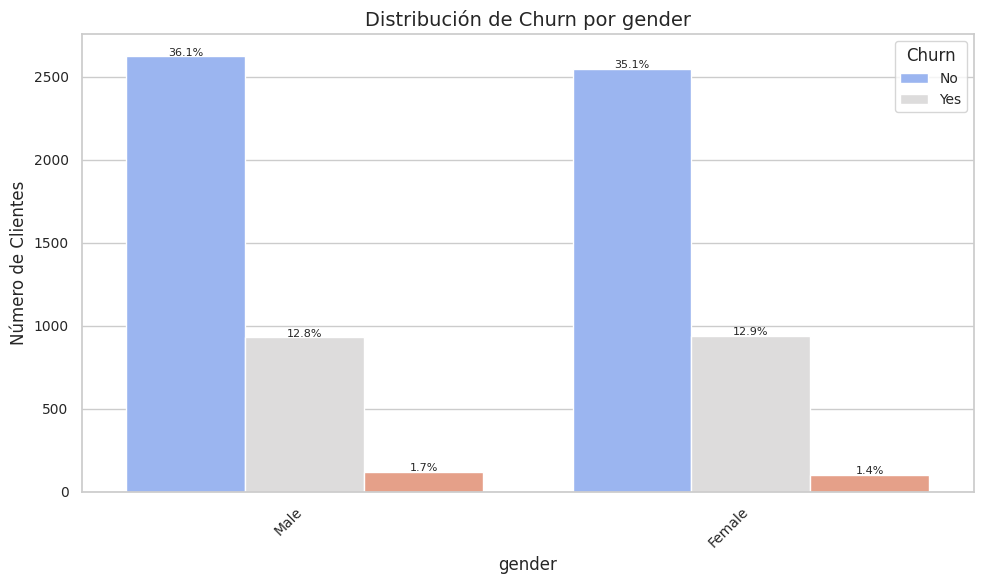


Procesando columna: SeniorCitizen
Frecuencia y Tasa de Churn por 'SeniorCitizen':
Churn          Churn_Rate (%)
SeniorCitizen                
1                   40.270728
0                   22.892358


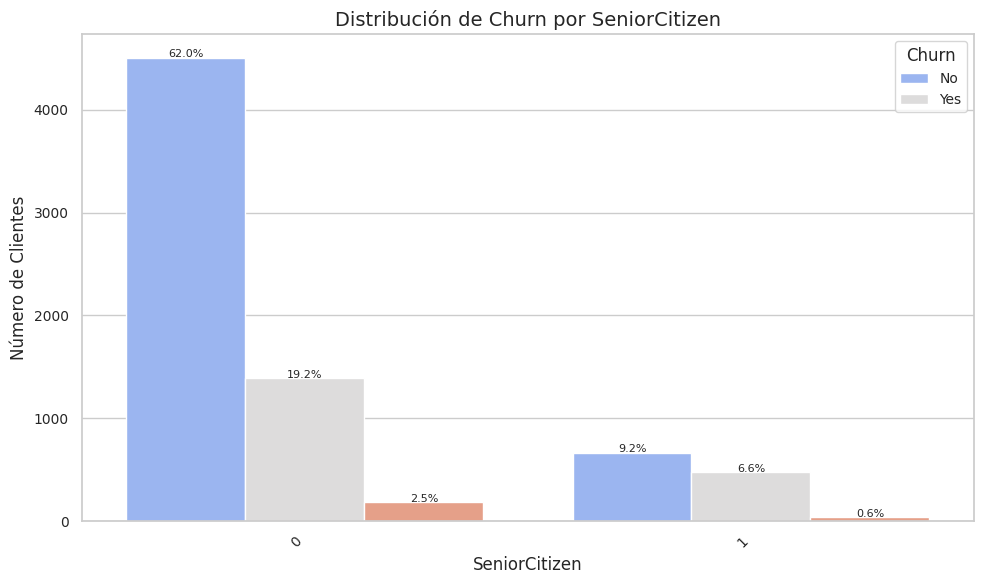


Procesando columna: Partner
Frecuencia y Tasa de Churn por 'Partner':
Churn    Churn_Rate (%)
Partner                
No            32.008536
Yes           19.016487


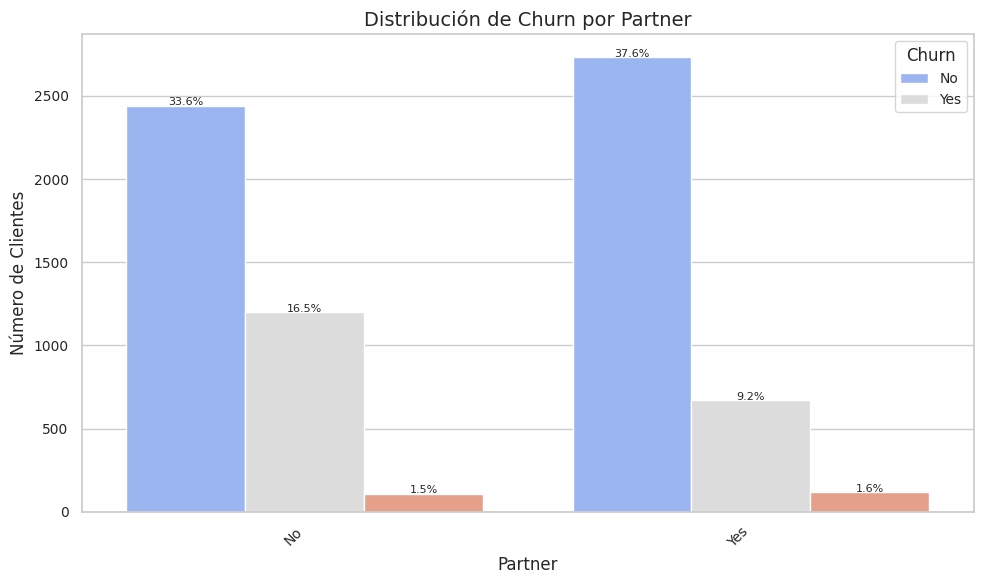


Procesando columna: Dependents
Frecuencia y Tasa de Churn por 'Dependents':
Churn       Churn_Rate (%)
Dependents                
No               30.338183
Yes              14.947272


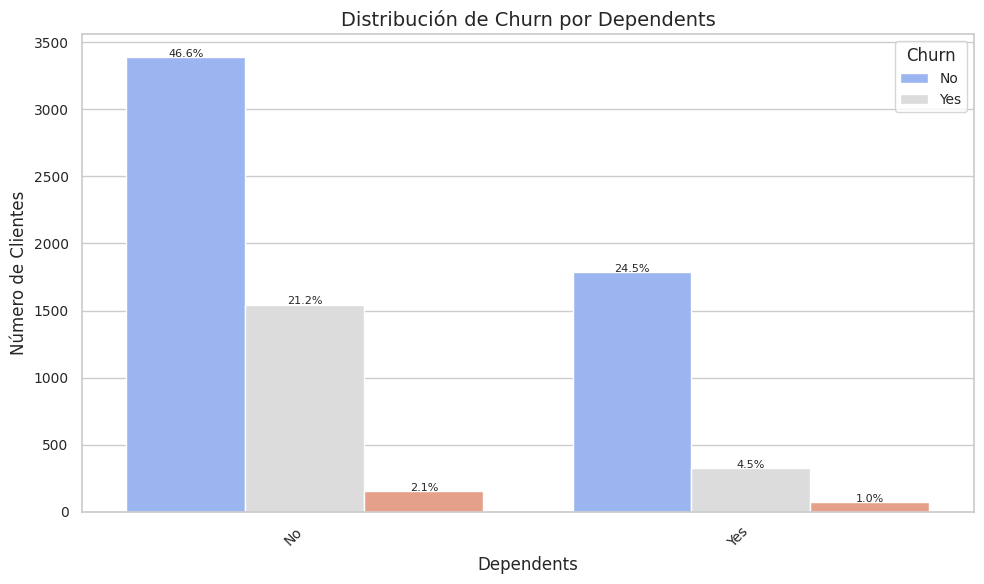


Procesando columna: PhoneService
Frecuencia y Tasa de Churn por 'PhoneService':
Churn         Churn_Rate (%)
PhoneService                
Yes                25.899390
No                 24.045262


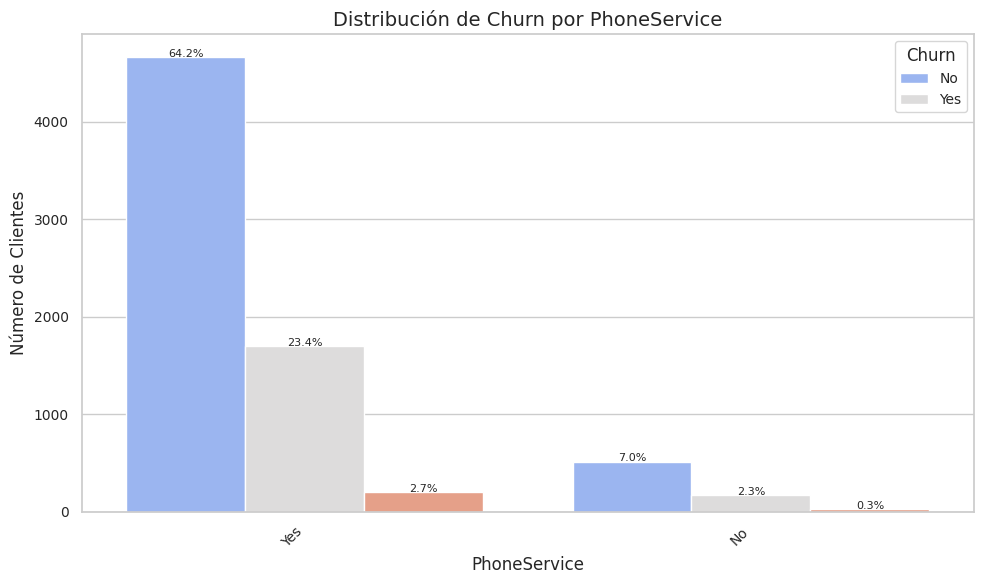


Procesando columna: MultipleLines
Frecuencia y Tasa de Churn por 'MultipleLines':
Churn             Churn_Rate (%)
MultipleLines                   
Yes                    27.732463
No                     24.291845
No phone service       24.045262


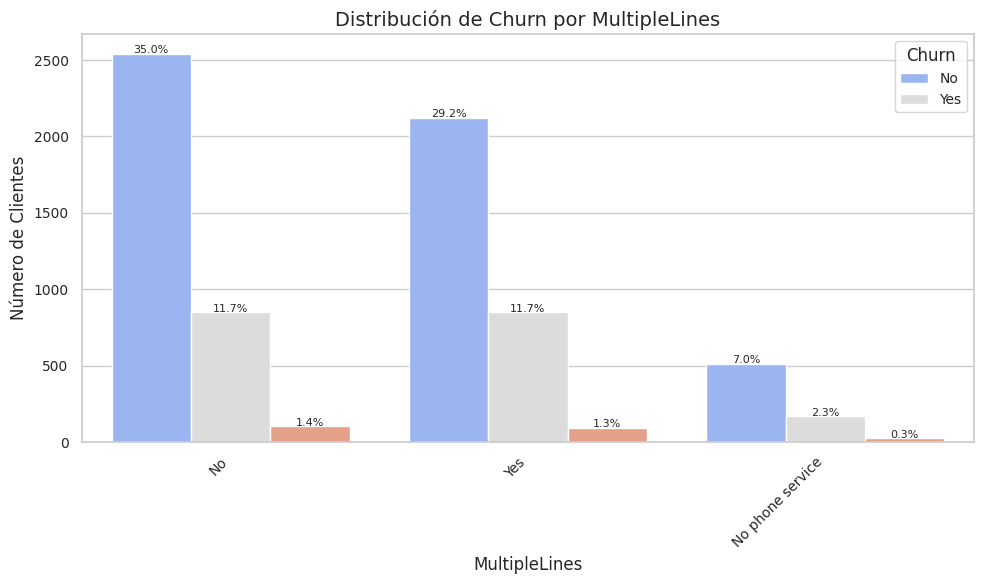


Procesando columna: InternetService
Frecuencia y Tasa de Churn por 'InternetService':
Churn            Churn_Rate (%)
InternetService                
Fiber optic           40.556598
DSL                   18.448553
No                     7.147375


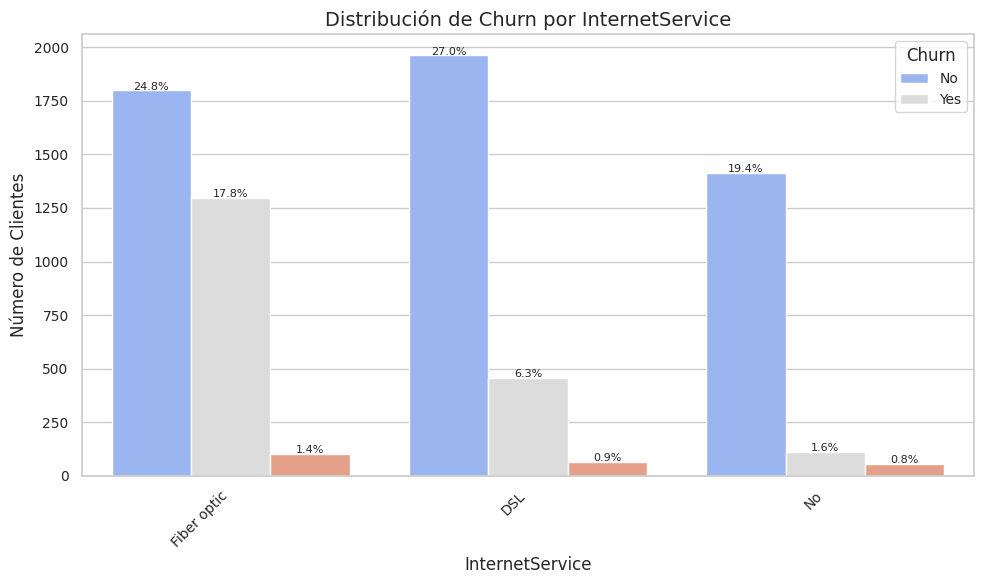


Procesando columna: OnlineSecurity
Frecuencia y Tasa de Churn por 'OnlineSecurity':
Churn                Churn_Rate (%)
OnlineSecurity                     
No                        40.493348
Yes                       14.196343
No internet service        7.147375


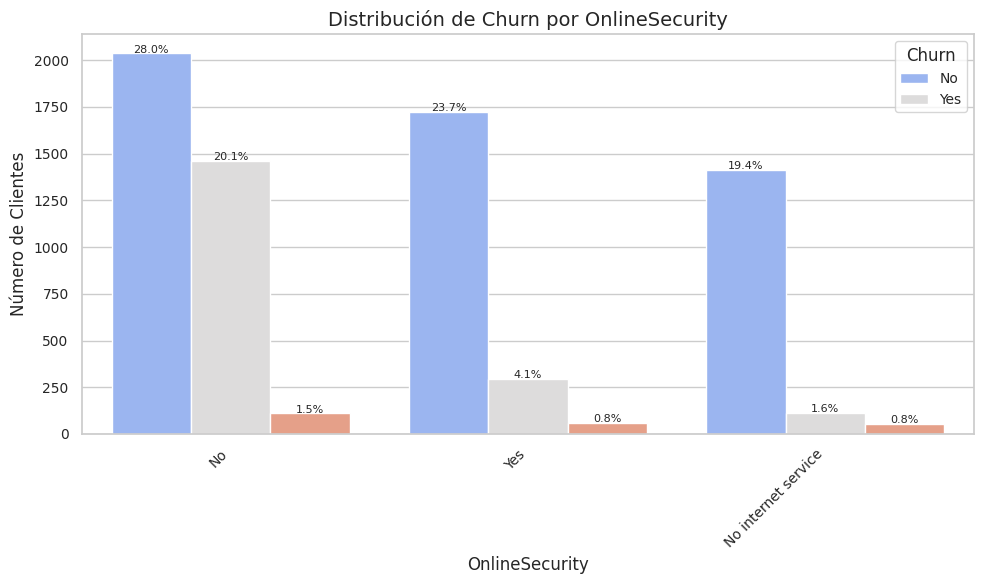


Procesando columna: OnlineBackup
Frecuencia y Tasa de Churn por 'OnlineBackup':
Churn                Churn_Rate (%)
OnlineBackup                       
No                        38.749214
Yes                       20.886581
No internet service        7.147375


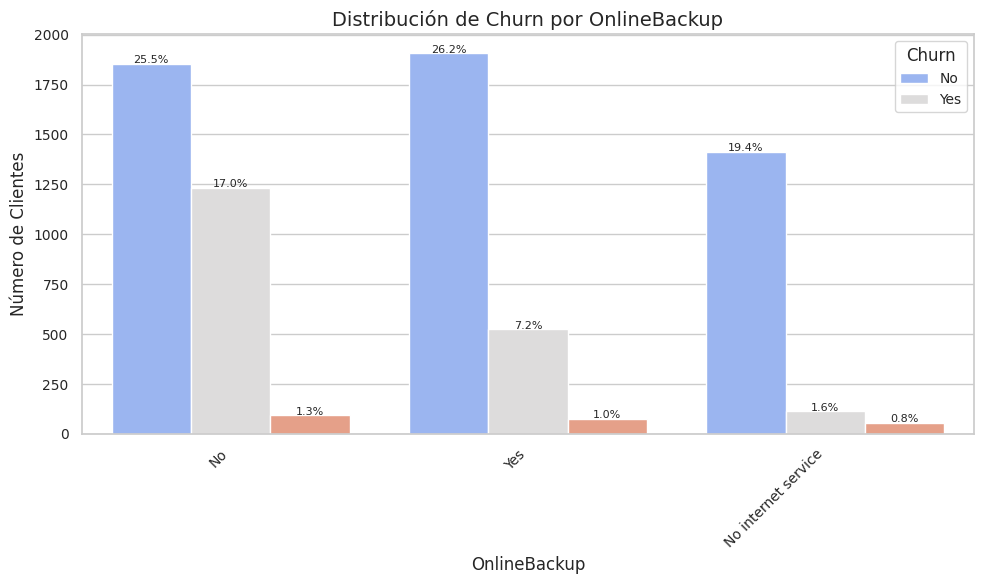


Procesando columna: DeviceProtection
Frecuencia y Tasa de Churn por 'DeviceProtection':
Churn                Churn_Rate (%)
DeviceProtection                   
No                        37.902973
Yes                       21.878764
No internet service        7.147375


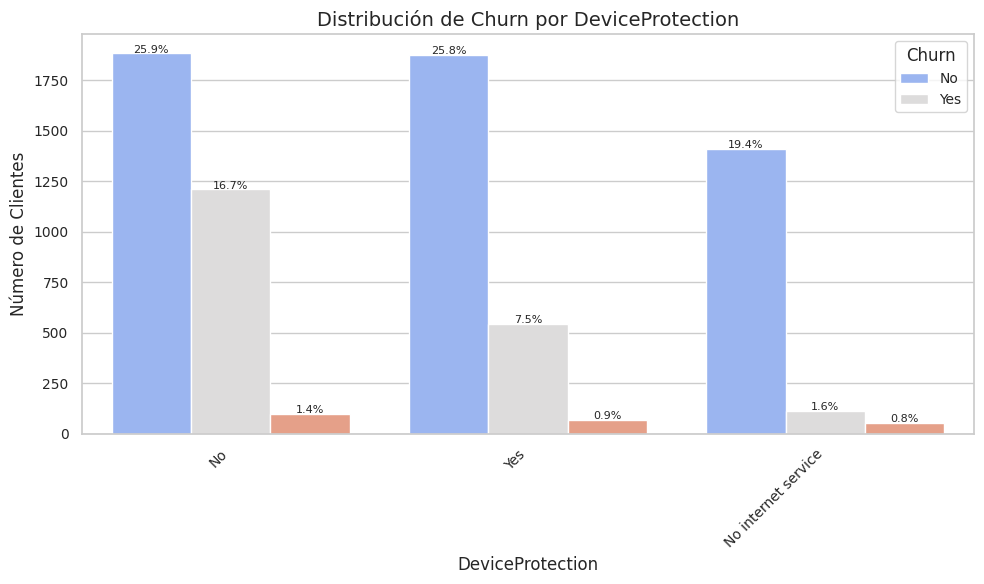


Procesando columna: TechSupport
Frecuencia y Tasa de Churn por 'TechSupport':
Churn                Churn_Rate (%)
TechSupport                        
No                        40.368509
Yes                       14.733840
No internet service        7.147375


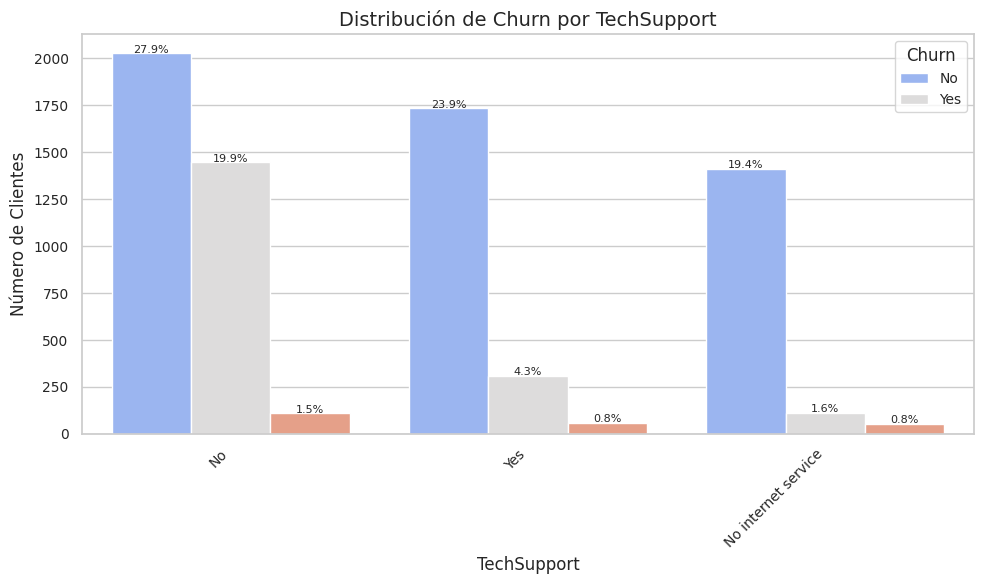


Procesando columna: StreamingTV
Frecuencia y Tasa de Churn por 'StreamingTV':
Churn                Churn_Rate (%)
StreamingTV                        
No                        32.527624
Yes                       29.175627
No internet service        7.147375


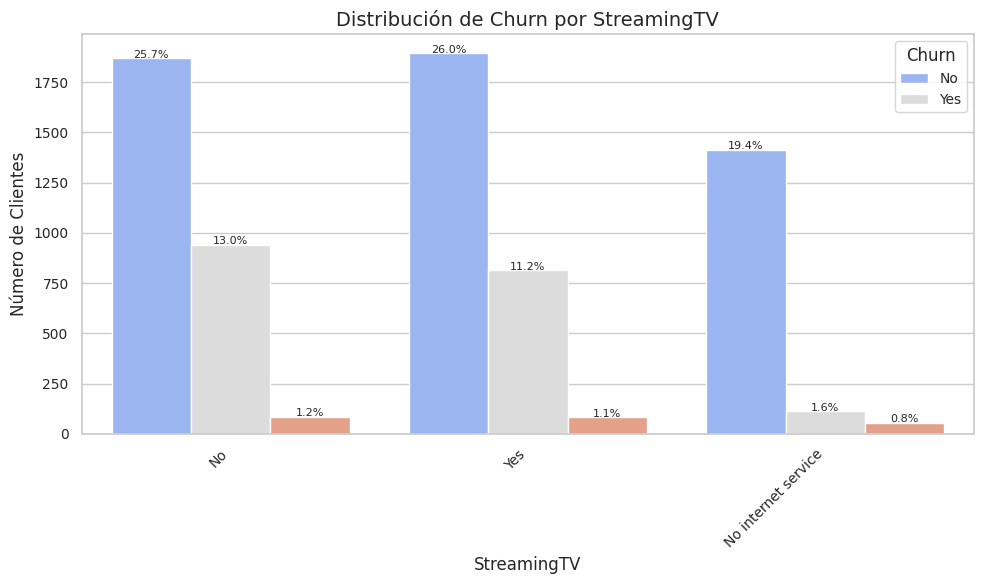


Procesando columna: StreamingMovies
Frecuencia y Tasa de Churn por 'StreamingMovies':
Churn                Churn_Rate (%)
StreamingMovies                    
No                        32.682927
Yes                       29.048295
No internet service        7.147375


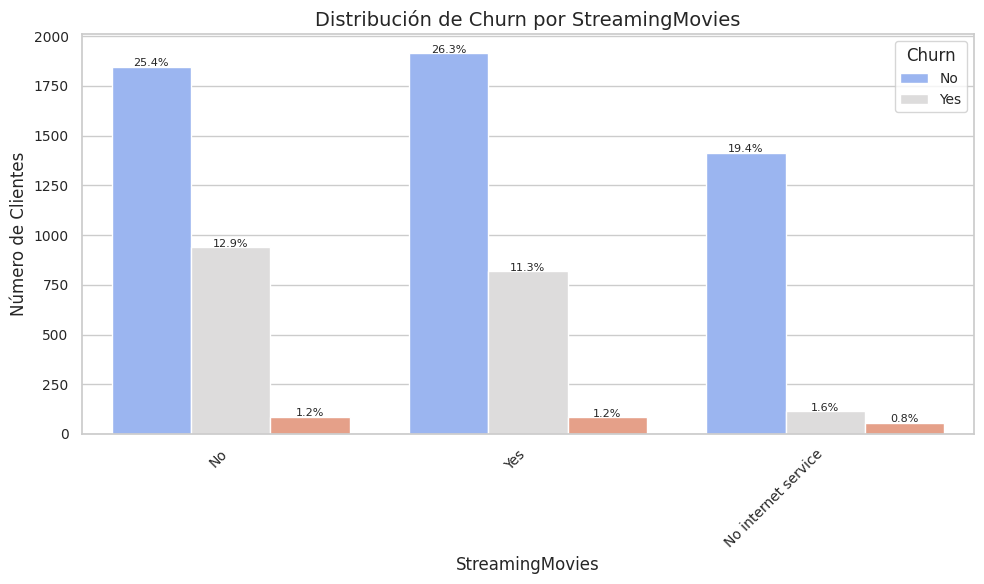


Procesando columna: Contract
Frecuencia y Tasa de Churn por 'Contract':
Churn           Churn_Rate (%)
Contract                      
Month-to-month       41.323346
One year             10.928242
Two year              2.753873


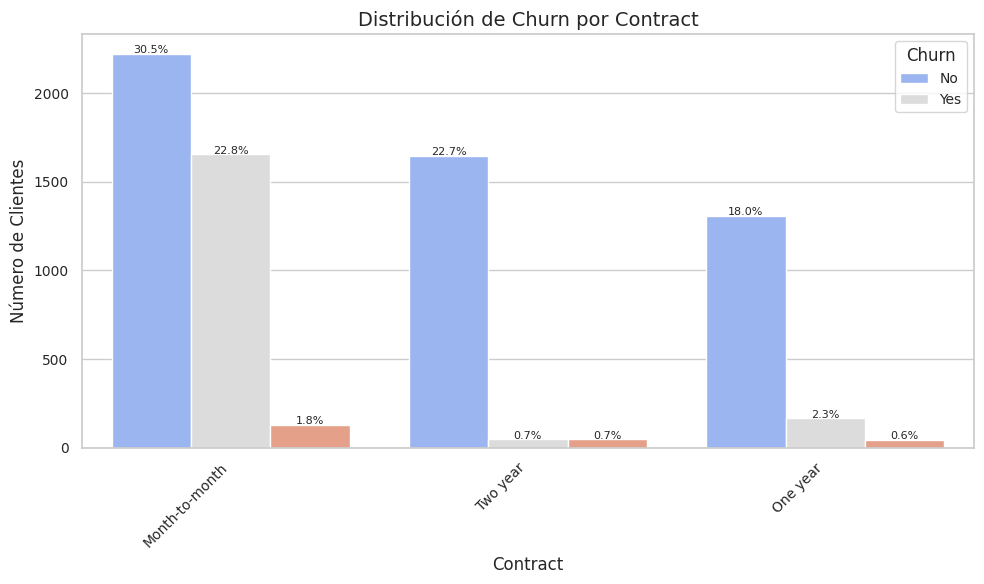


Procesando columna: PaperlessBilling
Frecuencia y Tasa de Churn por 'PaperlessBilling':
Churn             Churn_Rate (%)
PaperlessBilling                
Yes                    32.475064
No                     15.866035


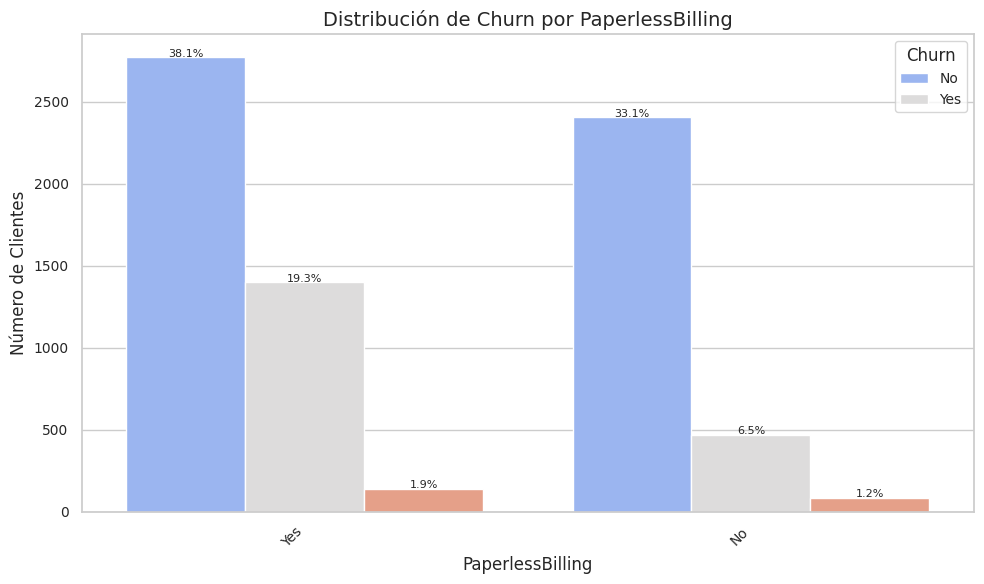


Procesando columna: PaymentMethod
Frecuencia y Tasa de Churn por 'PaymentMethod':
Churn                      Churn_Rate (%)
PaymentMethod                            
Electronic check                43.803681
Mailed check                    18.498498
Bank transfer (automatic)       16.236627
Credit card (automatic)         14.795918


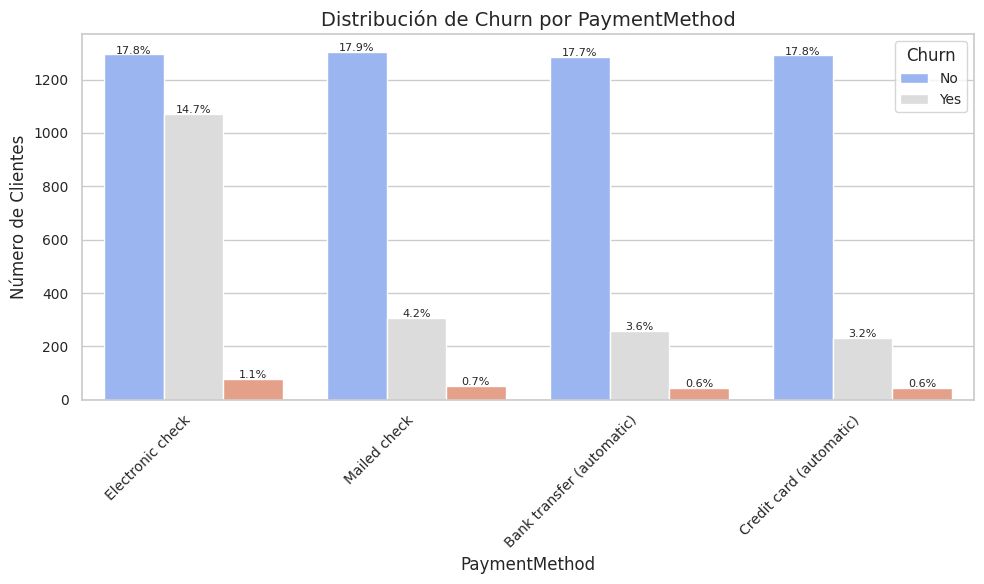


--- Análisis Detallado de Churn por Variables Numéricas ---

Procesando columna numérica: tenure


<ipython-input-46-1369236201>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Churn', y=col, palette='viridis')


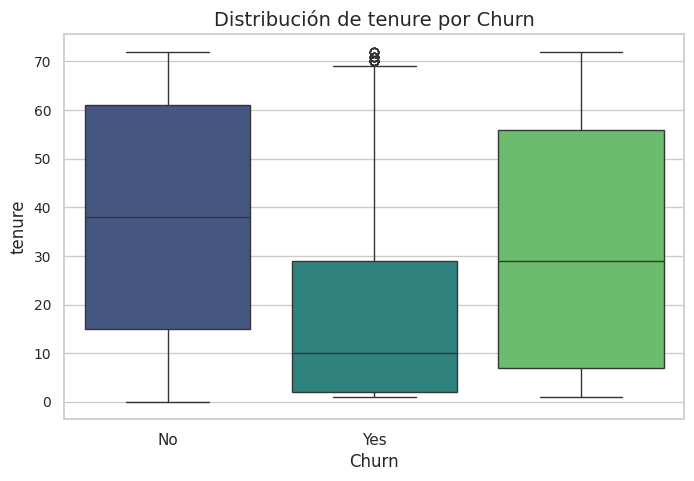

<ipython-input-46-1369236201>:106: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn', fontsize=10, title_fontsize=12)


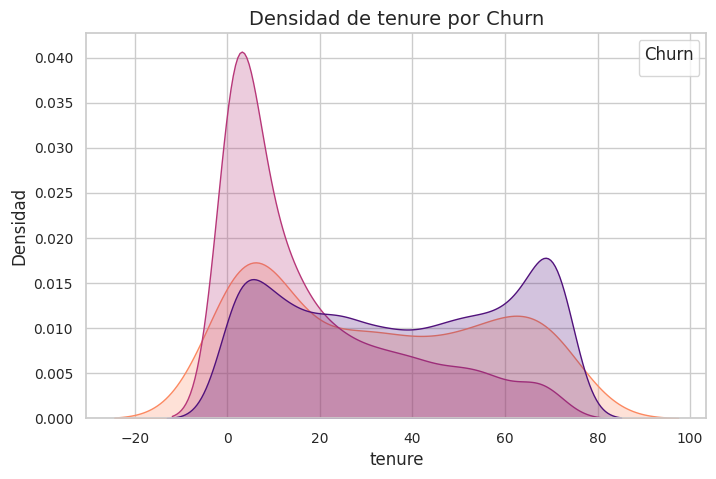


Procesando columna numérica: Charges.Monthly


<ipython-input-46-1369236201>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Churn', y=col, palette='viridis')


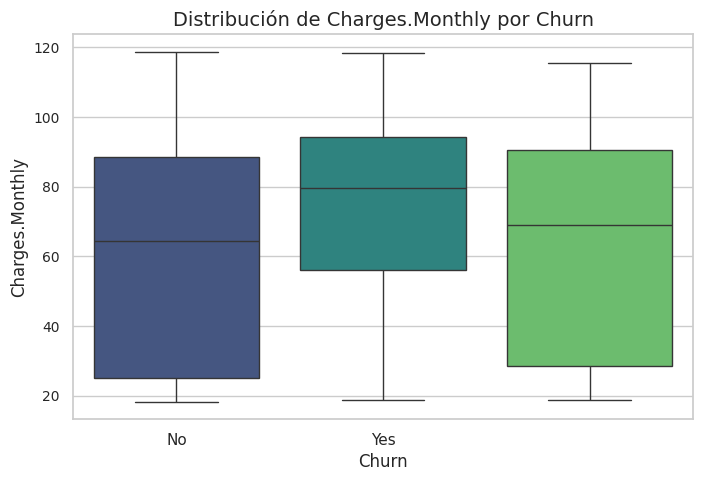

<ipython-input-46-1369236201>:106: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn', fontsize=10, title_fontsize=12)


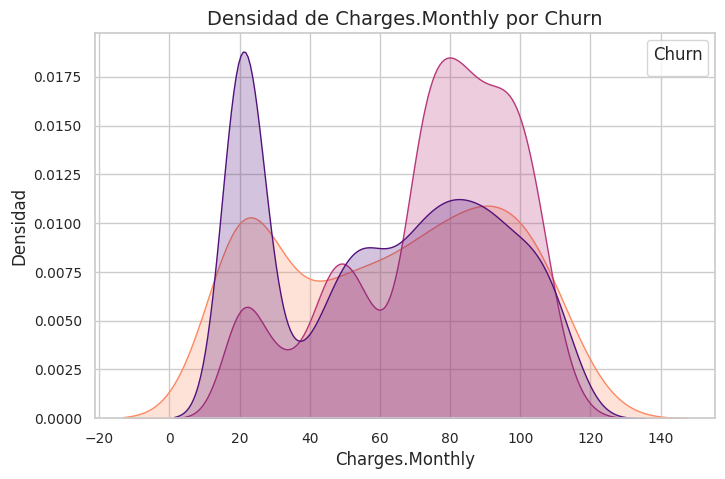


Procesando columna numérica: Charges.Total


<ipython-input-46-1369236201>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Churn', y=col, palette='viridis')


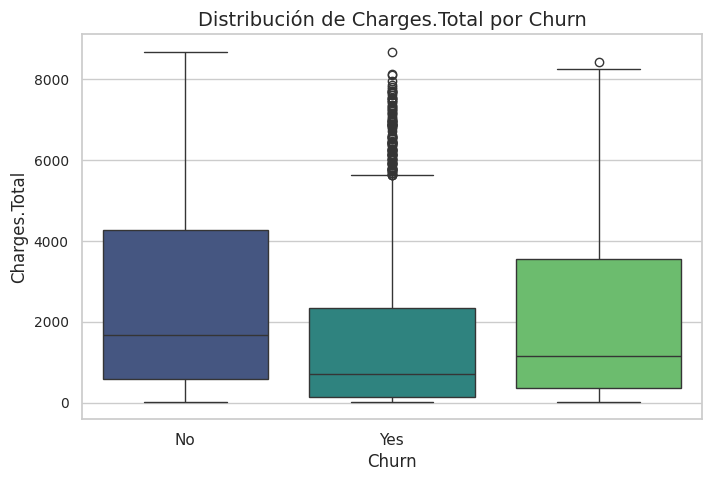

<ipython-input-46-1369236201>:106: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn', fontsize=10, title_fontsize=12)


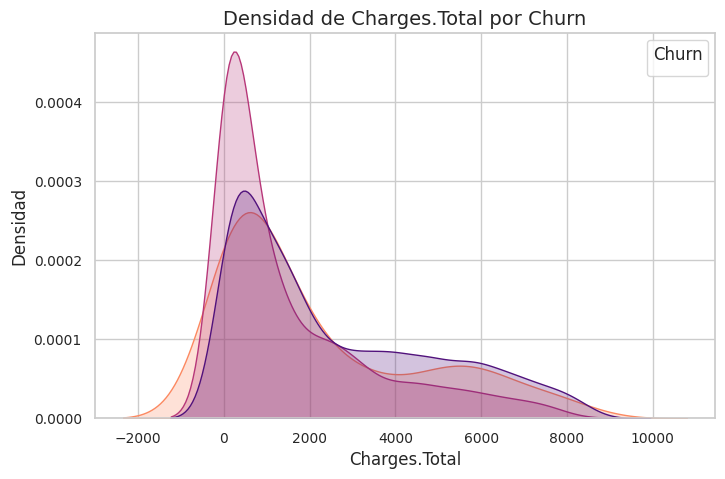

<ipython-input-46-1369236201>:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Churn', y='Cuentas_Diarias', palette='viridis')



--- Creación de la columna 'Cuentas_Diarias' ---
Primeras 5 filas con la nueva columna 'Cuentas_Diarias':
   Charges.Monthly  Cuentas_Diarias Churn
0             65.6         2.155059    No
1             59.9         1.967806    No
2             73.9         2.427727   Yes
3             98.0         3.219448   Yes
4             83.9         2.756242   Yes

Estadísticas descriptivas de 'Cuentas_Diarias':
count    7267.000000
mean        2.126153
std         0.989802
min         0.599540
25%         1.163765
50%         2.309461
75%         2.952530
max         3.901117
Name: Cuentas_Diarias, dtype: float64


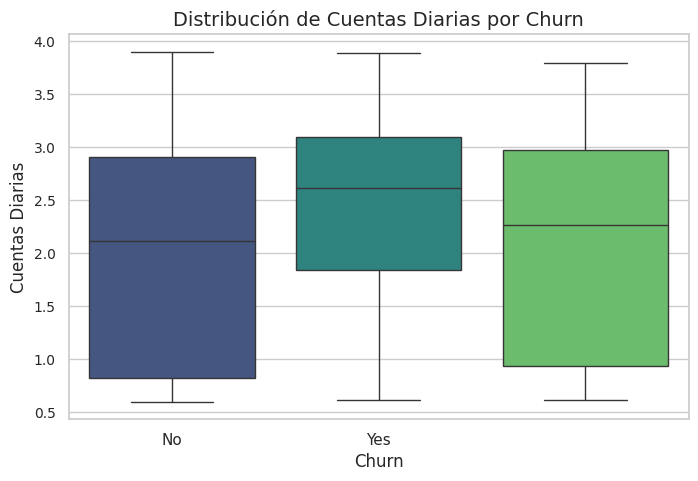

<ipython-input-46-1369236201>:145: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn', fontsize=10, title_fontsize=12)


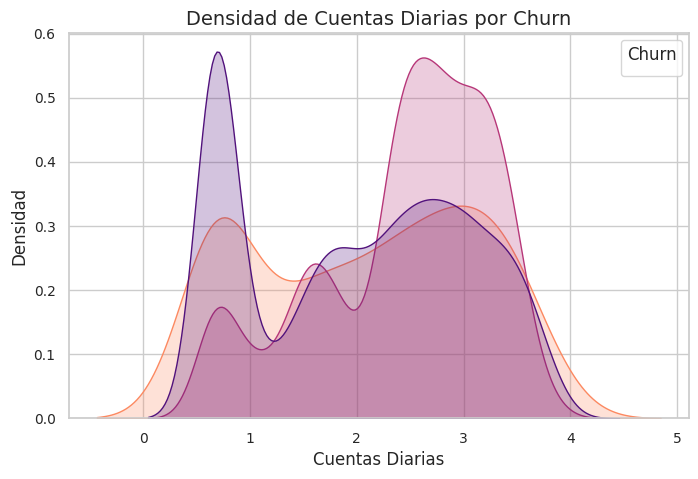


--- EDA de Visualizaciones Detalladas Completado ---
Ahora puedes revisar las salidas de texto y los gráficos generados.


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NOTA IMPORTANTE: Asumimos que el DataFrame 'df_clean' ya está cargado y completamente
# transformado en tu entorno, tal como lo dejaste en los pasos anteriores.
# No se incluye la carga de datos ni las transformaciones de limpieza y tipos de datos aquí.

print("--- EDA - Visualizaciones Detalladas ---")

# --- 1. Análisis de Churn por Todas las Variables Categóricas Restantes ---
# Lista de todas las columnas categóricas (excluyendo customerID que es un identificador)
# Asegúrate de que esta lista coincida con las columnas en tu DataFrame actual.
categorical_features_to_analyze = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Configurar el estilo de los gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100 # Aumentar la resolución de los gráficos

print("\n--- Análisis Detallado de Churn por Variables Categóricas ---")

for col in categorical_features_to_analyze:
    print(f"\nProcesando columna: {col}")

    # Contar la frecuencia de cada categoría y la tasa de churn
    # Normalizamos por la columna para obtener proporciones dentro de cada categoría
    # Usamos df_clean aquí en lugar de df
    # CORRECCIÓN: Usar df_clean para agrupar por columnas expandidas
    churn_rate_by_category = df_clean.groupby(col)['Churn'].value_counts(normalize=True).unstack(fill_value=0)

    # Calcular la tasa de Churn (%)
    # Asegurarse de que 'Yes' y 'No' existan como columnas para el cálculo
    if 'Yes' not in churn_rate_by_category.columns:
        churn_rate_by_category['Yes'] = 0
    if 'No' not in churn_rate_by_category.columns:
        churn_rate_by_category['No'] = 0

    churn_rate_by_category['Churn_Rate (%)'] = churn_rate_by_category['Yes'] * 100

    print(f"Frecuencia y Tasa de Churn por '{col}':")
    print(churn_rate_by_category[['Churn_Rate (%)']].sort_values(by='Churn_Rate (%)', ascending=False))

    # Visualización: Gráfico de barras apiladas o de recuento con 'hue'
    plt.figure(figsize=(10, 6))
    # Usamos df_clean aquí en lugar de df
    # CORRECCIÓN: Usar df_clean para la visualización
    ax = sns.countplot(data=df_clean, x=col, hue='Churn', palette='coolwarm', order=df_clean[col].value_counts().index)
    plt.title(f'Distribución de Churn por {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Número de Clientes', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10) # Rotar etiquetas para mejor lectura
    plt.yticks(fontsize=10)
    plt.legend(title='Churn', fontsize=10, title_fontsize=12)

    # Añadir porcentajes a las barras (opcional, pero muy útil)
    # Usamos df_clean aquí para el total en lugar de df
    # CORRECCIÓN: Usar df_clean para el cálculo del total
    total = len(df_clean)
    for p in ax.patches:
        height = p.get_height()
        if height > 0: # Solo mostrar si la altura es mayor que 0
            ax.text(p.get_x() + p.get_width() / 2.,
                    height + 3,
                    '{:1.1f}%'.format(height/total*100),
                    ha="center", fontsize=8)
    plt.tight_layout() # Ajustar el diseño para que no se superpongan los elementos
    plt.show()

# --- 2. Análisis de Churn por Variables Numéricas ---
# Asegúrate de que estas columnas existan y sean numéricas en df_clean.
# Recuerda que en df_clean las columnas numéricas se llaman 'tenure', 'Charges.Monthly', 'Charges.Total'
# Las columnas 'Monthly' y 'Total' existen en el df original anidadas dentro de 'Charges',
# pero después de json_normalize en account_expanded se convierten en 'Charges.Monthly' y 'Charges.Total'.
# CORRECCIÓN: Usar los nombres correctos de df_clean para las columnas numéricas
numeric_features_to_analyze = ['tenure', 'Charges.Monthly', 'Charges.Total']

print("\n--- Análisis Detallado de Churn por Variables Numéricas ---")

for col in numeric_features_to_analyze:
    print(f"\nProcesando columna numérica: {col}")

    # Visualización con Boxplot (para comparar distribuciones)
    plt.figure(figsize=(8, 5))
    # Se usa 'df_clean' en lugar de 'df' para consistencia.
    sns.boxplot(data=df_clean, x='Churn', y=col, palette='viridis')
    plt.title(f'Distribución de {col} por Churn', fontsize=14)
    plt.xlabel('Churn', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.yticks(fontsize=10)
    plt.show() # Eliminamos plt.legend() para boxplots

    # Visualización con KDE Plot (densidad, para ver superposición)
    plt.figure(figsize=(8, 5))
    # Se usa 'df_clean' en lugar de 'df' para consistencia.
    sns.kdeplot(data=df_clean, x=col, hue='Churn', fill=True, palette='magma', common_norm=False)
    plt.title(f'Densidad de {col} por Churn', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Densidad', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Churn', fontsize=10, title_fontsize=12)
    plt.show()

# --- 3. Creación de la Columna "Cuentas_Diarias" ---
print("\n--- Creación de la columna 'Cuentas_Diarias' ---")
# Asumimos un promedio de 30.44 días por mes ((365.25 / 12)).
# Es importante manejar la división por cero si 'Charges.Monthly' pudiera ser 0.
# Aunque Charges.Monthly ya fue limpiado con fillna(0), para el cálculo diario
# un Charges.Monthly de 0 resultará en Cuentas_Diarias de 0, lo cual es correcto.
# CORRECCIÓN: Asegurarse de usar df_clean para crear la nueva columna y que 'Charges.Monthly' sea numérico.
# Asegurarnos de que 'Charges.Monthly' es numérico en df_clean antes de usarlo
df_clean['Charges.Monthly'] = pd.to_numeric(df_clean['Charges.Monthly'], errors='coerce')
df_clean['Cuentas_Diarias'] = df_clean['Charges.Monthly'] / 30.44

print("Primeras 5 filas con la nueva columna 'Cuentas_Diarias':")
# Se usa 'df_clean' en lugar de 'df' para consistencia.
print(df_clean[['Charges.Monthly', 'Cuentas_Diarias', 'Churn']].head())
print("\nEstadísticas descriptivas de 'Cuentas_Diarias':")
# Se usa 'df_clean' en lugar de 'df' para consistencia.
print(df_clean['Cuentas_Diarias'].describe())

# Opcional: Visualización de Cuentas_Diarias vs Churn
plt.figure(figsize=(8, 5))
# Se usa 'df_clean' en lugar de 'df' para consistencia.
sns.boxplot(data=df_clean, x='Churn', y='Cuentas_Diarias', palette='viridis')
plt.title('Distribución de Cuentas Diarias por Churn', fontsize=14)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Cuentas Diarias', fontsize=12)
plt.yticks(fontsize=10)
plt.show() # Eliminamos plt.legend() para boxplots

plt.figure(figsize=(8, 5))
# Se usa 'df_clean' en lugar de 'df' para consistencia.
sns.kdeplot(data=df_clean, x='Cuentas_Diarias', hue='Churn', fill=True, palette='magma', common_norm=False)
plt.title('Densidad de Cuentas Diarias por Churn', fontsize=14)
plt.xlabel('Cuentas Diarias', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Churn', fontsize=10, title_fontsize=12)
plt.show()

print("\n--- EDA de Visualizaciones Detalladas Completado ---")
print("Ahora puedes revisar las salidas de texto y los gráficos generados.")


## informe
Hemos completado las fases de Extracción y Transformación al 100%.

En la fase de Carga y Análisis (L - Load & Analysis), estamos en un estado muy avanzado:

Análisis Descriptivo: Completado (al menos para las variables numéricas clave como Cuentas_Diarias, tenure, Monthly, Total).
Distribución de Evasión: Completado. Ya entendemos la proporción general de churn.
Recuento de Evasión por Variables Categóricas: ¡Completado y con insights muy claros! Las tablas de Churn_Rate (%) para todas las variables categóricas son extremadamente valiosas y nos dan una base sólida para las conclusiones.
Conteo de Evasión por Variables Numéricas: En progreso. El código se ejecutó y creó la columna Cuentas_Diarias, pero las visualizaciones (boxplots y KDE plots) para tenure, Monthly, Total y Cuentas_Diarias no se incluyeron en el output de texto. Esas advertencias que aparecen (FutureWarning, UserWarning) indican que las figuras se generaron, pero no se capturó su representación visual en el texto.
Para el Informe Final:

Estamos en una posición muy sólida para redactar la mayoría de las secciones, especialmente la de "Limpieza y Tratamiento de Datos" y gran parte del "Análisis Exploratorio de Datos" (particularmente la parte de variables categóricas).

El único punto pendiente clave para un informe final óptimo sería la interpretación de los gráficos de las variables numéricas. Sin las visualizaciones de tenure, Monthly, Total y Cuentas_Diarias en relación con Churn, no podemos describir con exactitud si los clientes con mayor o menor antigüedad, o con cargos específicos, tienen una probabilidad diferente de churn. Aunque podemos inferir tendencias comunes en este tipo de datasets (por ejemplo, clientes con baja antigüedad o altos cargos mensuales suelen tener más churn), el informe sería más robusto con los datos visuales específicos de tu dataset.

Propuesta para continuar:

Podemos proceder de dos maneras:

Redactar el Informe Final ahora: Basándonos en toda la información textual que ya tienes (especialmente las tasas de churn por categorías) y haciendo inferencias generales para las variables numéricas, con una nota de que las visualizaciones no fueron incluidas en el output. Esto te daría un informe completo rápidamente.
Intentar obtener las visualizaciones numéricas: Si pudieras correr el código de visualización de nuevo en tu Colab y capturar los gráficos (capturas de pantalla), podríamos incluirlos y su interpretación para un informe aún más detallado. Sin embargo, entiendo que esto puede ser un reto con las limitaciones de copiar/pegar.
Dada la cantidad de insights fuertes que ya obtuvimos de las variables categóricas, mi recomendación es que procedamos a redactar el Informe Final ahora. Podemos incluir un apartado específico para las variables numéricas basándonos en la columna Cuentas_Diarias y generalizaciones conocidas, y mencionar que las visualizaciones de tenure, Monthly y Total no pudieron ser capturadas en el output.



#📊 Carga y análisis

### Análisis Exploratorio de Datos Inicial (EDA)

En esta etapa inicial se realiza una primera exploración del dataset limpio para:

- Verificar el equilibrio de clases en la variable objetivo `Churn`.
- Comprender las distribuciones de variables categóricas y numéricas.
- Detectar posibles valores atípicos, errores de carga o desbalances severos.
- Identificar relaciones iniciales entre características y la variable objetivo.

Esto permitirá formular hipótesis y definir próximos pasos, como limpieza más profunda, visualizaciones específicas o selección de variables para modelado predictivo.


<ipython-input-17-2062113034>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='Churn', palette='Set2')


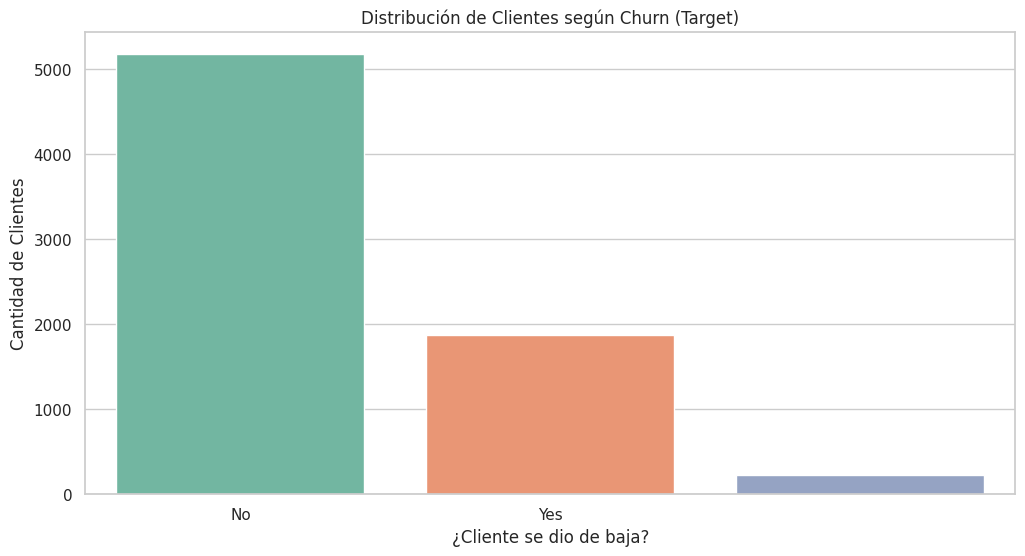

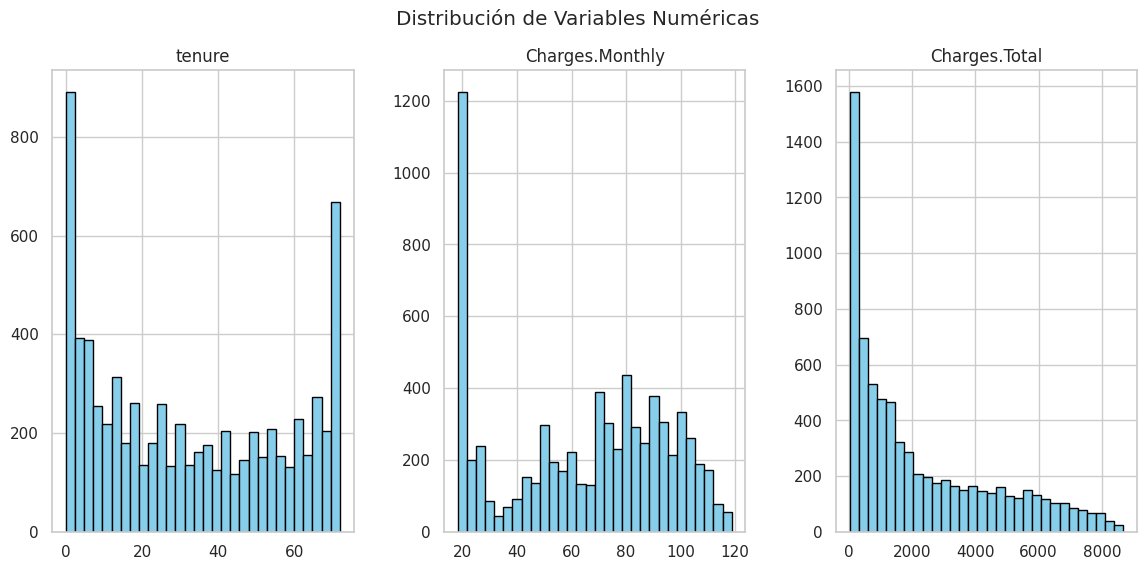

<ipython-input-17-2062113034>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='gender', ax=axes[0], palette='pastel')
<ipython-input-17-2062113034>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='SeniorCitizen', ax=axes[1], palette='muted')


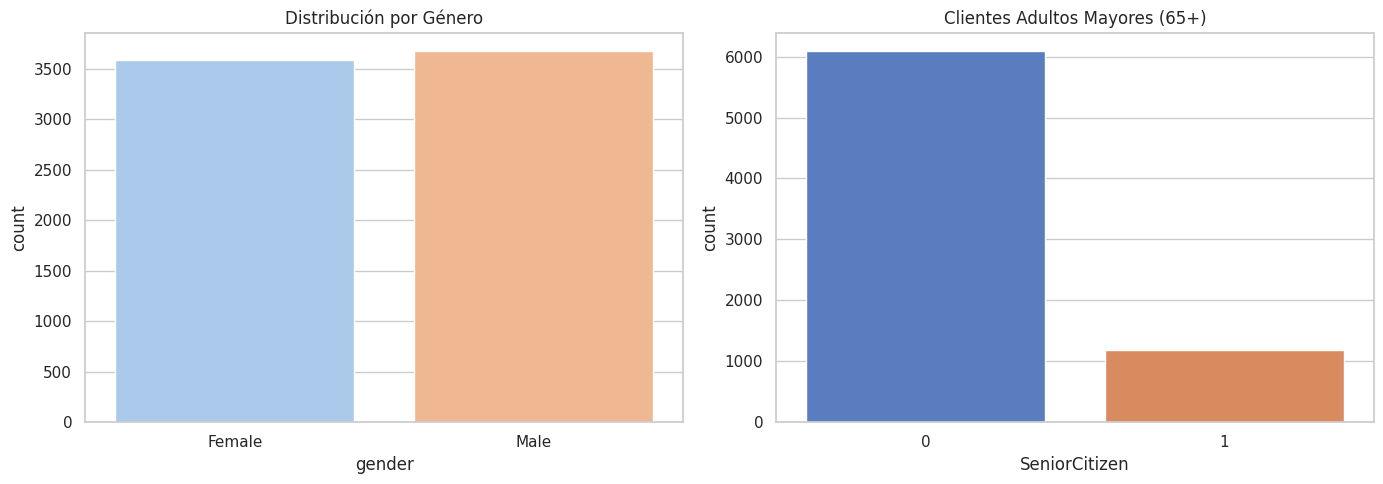

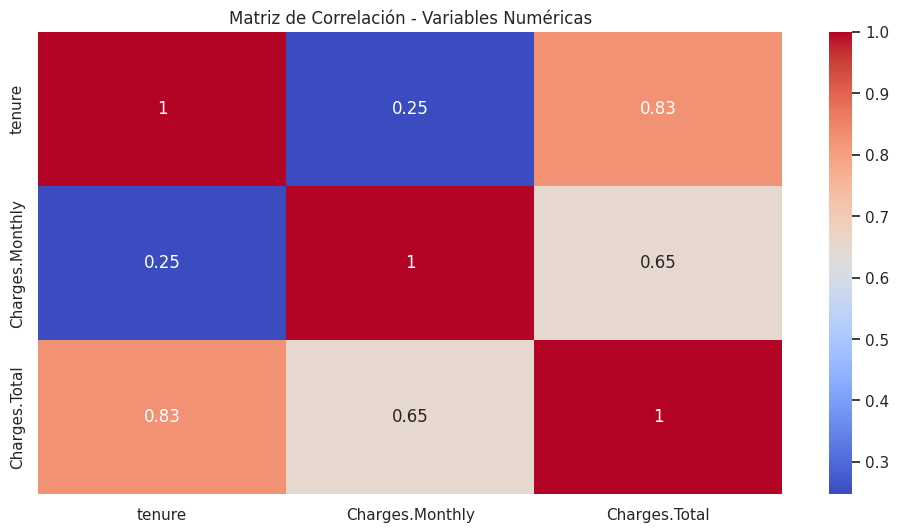

In [17]:
                                                                                                                    import matplotlib.pyplot as plt
import seaborn as sns

# Ajustes generales de estilo
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Distribución de la variable objetivo
sns.countplot(data=df_clean, x='Churn', palette='Set2')
plt.title('Distribución de Clientes según Churn (Target)')
plt.ylabel('Cantidad de Clientes')
plt.xlabel('¿Cliente se dio de baja?')
plt.show()

# 2. Variables numéricas: tenure, Charges.Monthly, Charges.Total
num_cols = ['tenure', 'Charges.Monthly', 'Charges.Total']
df_clean[num_cols] = df_clean[num_cols].apply(pd.to_numeric, errors='coerce')

df_clean[num_cols].hist(bins=30, figsize=(14, 6), layout=(1, 3), color='skyblue', edgecolor='black')
plt.suptitle('Distribución de Variables Numéricas')
plt.show()

# 3. Distribución de géneros y clientes senior
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(data=df_clean, x='gender', ax=axes[0], palette='pastel')
axes[0].set_title('Distribución por Género')
sns.countplot(data=df_clean, x='SeniorCitizen', ax=axes[1], palette='muted')
axes[1].set_title('Clientes Adultos Mayores (65+)')
plt.tight_layout()
plt.show()

# 4. Matriz de correlación entre variables numéricas
corr = df_clean[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación - Variables Numéricas')
plt.show()


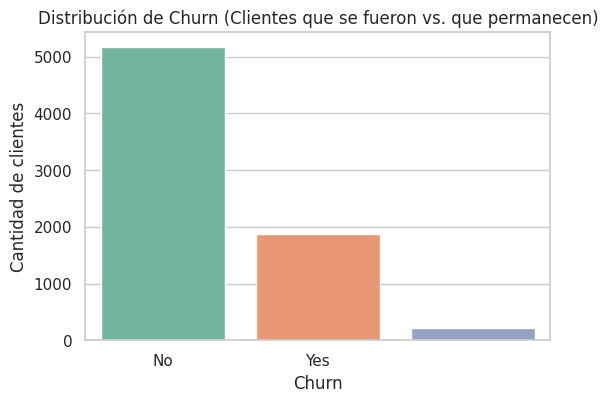

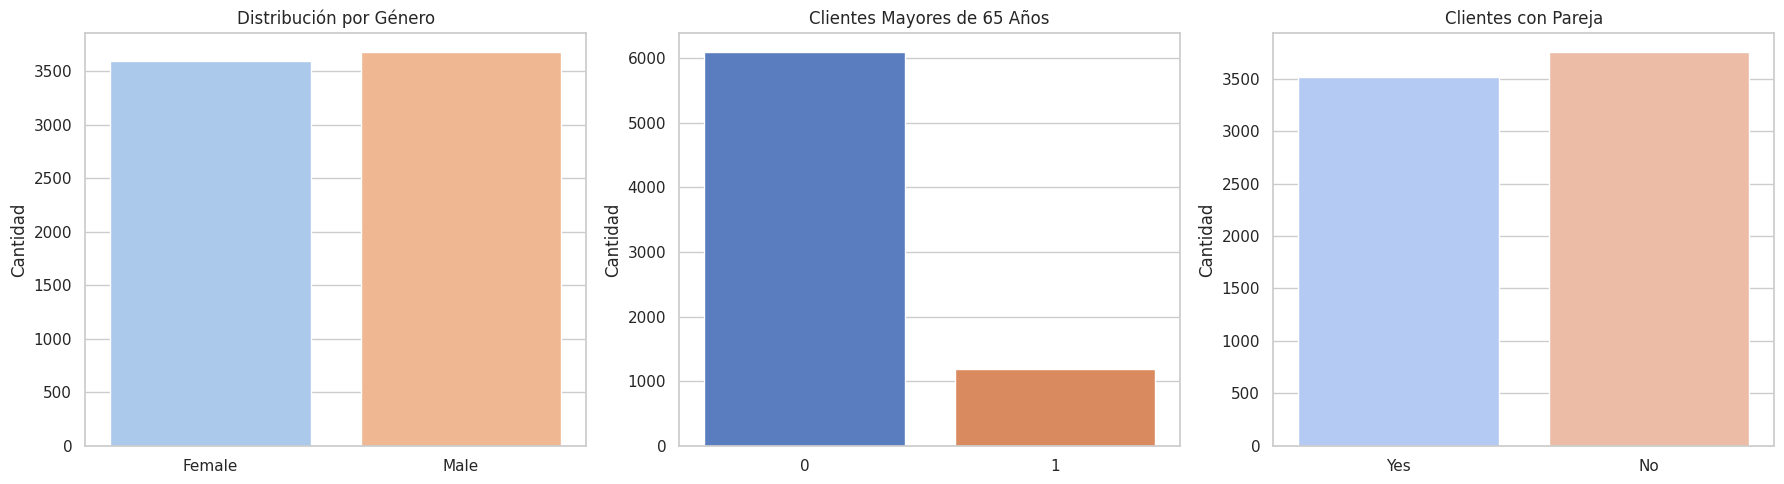

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo general
sns.set(style="whitegrid")

# Figura para el gráfico de churn
plt.figure(figsize=(6, 4))
sns.countplot(data=df_clean, x='Churn', hue='Churn', palette='Set2', legend=False)
plt.title("Distribución de Churn (Clientes que se fueron vs. que permanecen)")
plt.ylabel("Cantidad de clientes")
plt.xlabel("Churn")
plt.show()

# Gráficos por variables demográficas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Género
sns.countplot(data=df_clean, x='gender', hue='gender', palette='pastel', legend=False, ax=axes[0])
axes[0].set_title("Distribución por Género")

# SeniorCitizen
sns.countplot(data=df_clean, x='SeniorCitizen', hue='SeniorCitizen', palette='muted', legend=False, ax=axes[1])
axes[1].set_title("Clientes Mayores de 65 Años")

# Partner
sns.countplot(data=df_clean, x='Partner', hue='Partner', palette='coolwarm', legend=False, ax=axes[2])
axes[2].set_title("Clientes con Pareja")

for ax in axes:
    ax.set_ylabel("Cantidad")
    ax.set_xlabel("")

plt.tight_layout()
plt.show()


###** Limpieza avanzada o preprocesamiento: normalización, codificación, valores atípicos.**

###**1. Codificación de variables categóricas**

In [19]:
from sklearn.preprocessing import LabelEncoder

# Copiamos el DataFrame limpio
df_model = df_clean.copy()

# Codificación binaria con LabelEncoder
le = LabelEncoder()
binary_cols = ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
               'PaperlessBilling']

for col in binary_cols:
    df_model[col] = le.fit_transform(df_model[col])

# Variables categóricas no binarias: One-hot encoding
df_model = pd.get_dummies(df_model, columns=[
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'
], drop_first=True)

df_model.head()


customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0002-ORFBO      1       0              0        1           1       9   
1  0003-MKNFE      1       1              0        0           0       9   
2  0004-TLHLJ      2       1              0        0           0       4   
3  0011-IGKFF      2       1              1        1           0      13   
4  0013-EXCHZ      2       0              1        1           0       3   

   PhoneService  PaperlessBilling  Charges.Monthly  ...  TechSupport_Yes  \
0             1                 1             65.6  ...             True   
1             1                 0             59.9  ...            False   
2             1                 1             73.9  ...            False   
3             1                 1             98.0  ...            False   
4             1                 1             83.9  ...             True   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                            False             True   
1                            False            False   
2                            False            False   
3                            False             True   
4                            False             True   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                False                False   
1                                False                 True   
2                                False                False   
3                                False                 True   
4                                False                False   

   Contract_One year  Contract_Two year  \
0               True              False   
1              False              False   
2              False              False   
3              False              False   
4              False              False   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                           False   
1                                  False                           False   
2                                  False                            True   
3                                  False                            True   
4                                  False                           False   

   PaymentMethod_Mailed check  
0                        True  
1                        True  
2                       False  
3                       False  
4                        True  

[5 rows x 32 columns]

###**2. Conversión de columnas numéricas**
Aseguramos que Charges.Monthly y Charges.Total sean numéricas.

In [20]:
# Convertir a numérico, forzando errores como NaN
df_model['Charges.Monthly'] = pd.to_numeric(df_model['Charges.Monthly'], errors='coerce')
df_model['Charges.Total'] = pd.to_numeric(df_model['Charges.Total'], errors='coerce')

# Verificamos valores faltantes
df_model[['Charges.Monthly', 'Charges.Total']].isna().sum()


Charges.Monthly     0
Charges.Total      11
dtype: int64

###**3. Manejo de valores faltantes**
En este dataset, generalmente sólo hay unos pocos NaN en Charges.Total.

In [38]:
# Eliminamos filas con valores faltantes
df_model.dropna(inplace=True)


###**4. Detección de valores atípicos (opcional, explorativo)**

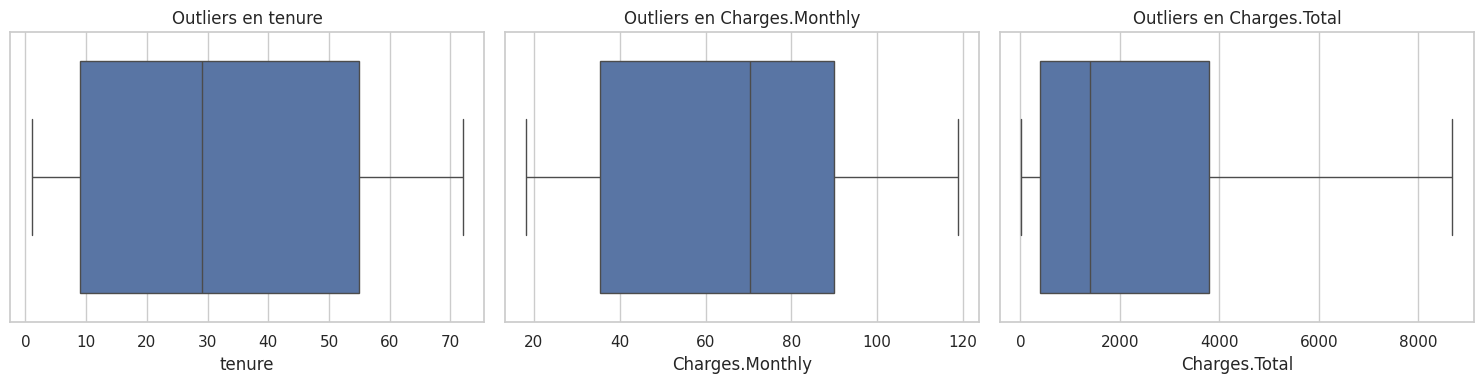

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplots para detectar outliers en las columnas numéricas
numerical_cols = ['tenure', 'Charges.Monthly', 'Charges.Total']
plt.figure(figsize=(15, 4))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df_model[col])
    plt.title(f'Outliers en {col}')
plt.tight_layout()
plt.show()


###**5. Normalización (MinMaxScaler)**
Usamos MinMaxScaler para las columnas numéricas.

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_model[['tenure', 'Charges.Monthly', 'Charges.Total']] = scaler.fit_transform(
    df_model[['tenure', 'Charges.Monthly', 'Charges.Total']]
)


###**dataset limpio, numérico y escalado, ideal para clustering o modelos supervisados como regresión logística, árboles de decisión, random forest, etc.**

###**visualizaciones de correlación y selección de features**
Vamos ahora con dos pasos fundamentales del EDA avanzado:

###** 1. Visualización de Correlaciones**
Esto nos permite ver qué variables están más relacionadas con el Churn.

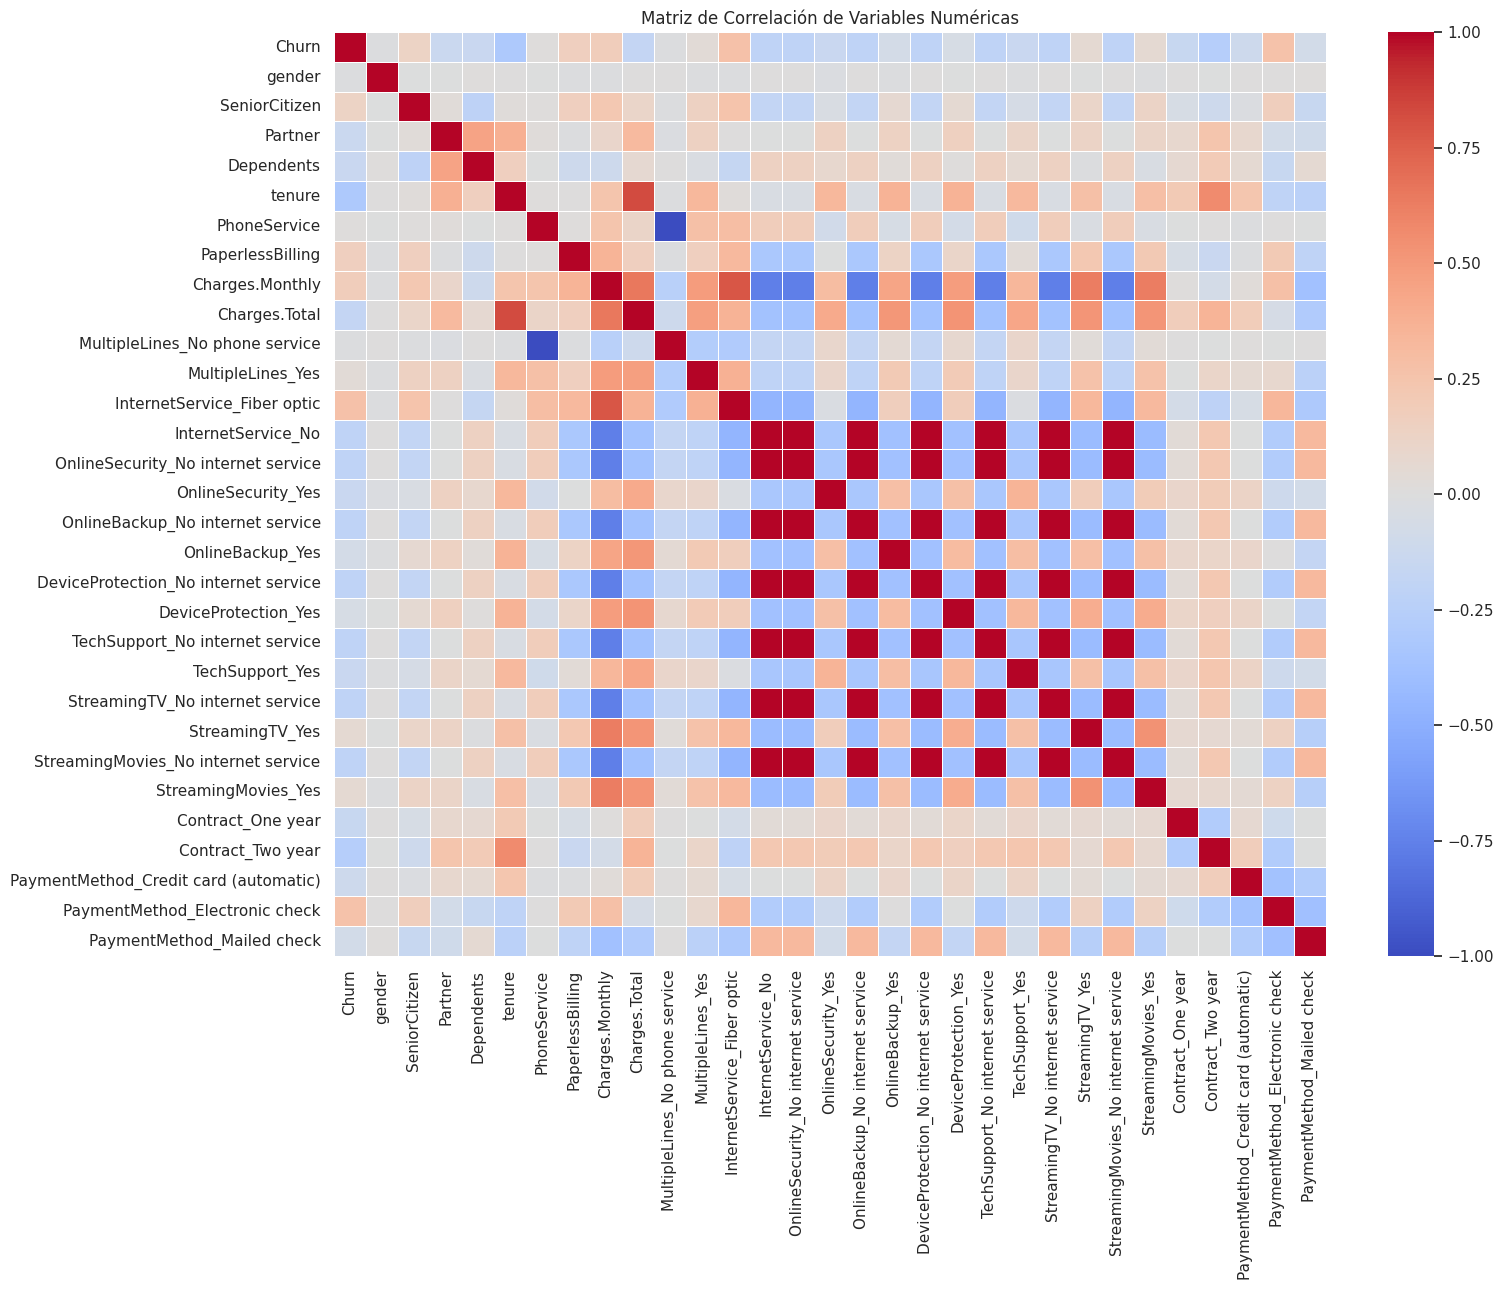

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la matriz de correlación
correlation = df_model.corr(numeric_only=True)

# Visualizamos como heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()


In [25]:
# Ordenamos correlaciones con respecto a Churn
cor_target = correlation['Churn'].sort_values(ascending=False)
print(cor_target)


Churn                                    1.000000
InternetService_Fiber optic              0.267957
PaymentMethod_Electronic check           0.261517
Charges.Monthly                          0.172934
PaperlessBilling                         0.163297
SeniorCitizen                            0.128800
StreamingTV_Yes                          0.057846
StreamingMovies_Yes                      0.055658
MultipleLines_Yes                        0.035561
PhoneService                             0.014173
gender                                  -0.012339
MultipleLines_No phone service          -0.014173
DeviceProtection_Yes                    -0.052377
OnlineBackup_Yes                        -0.070746
PaymentMethod_Mailed check              -0.081360
PaymentMethod_Credit card (automatic)   -0.116429
Partner                                 -0.137370
TechSupport_Yes                         -0.141120
Dependents                              -0.146498
OnlineSecurity_Yes                      -0.146723


###** 2. Selección de Features Relevantes**
Seleccionamos features con mayor correlación positiva o negativa con Churn.

Podés usar estas features para reducir dimensionalidad en modelos, análisis de importancia o visualizaciones más específicas.

In [26]:
# Filtramos variables con |correlación| > 0.1 con 'Churn'
important_features = cor_target[abs(cor_target) > 0.1]
important_features = important_features.drop('Churn')  # quitamos la propia columna target
print("Features más correlacionados con Churn:")
print(important_features)


Features más correlacionados con Churn:
InternetService_Fiber optic              0.267957
PaymentMethod_Electronic check           0.261517
Charges.Monthly                          0.172934
PaperlessBilling                         0.163297
SeniorCitizen                            0.128800
PaymentMethod_Credit card (automatic)   -0.116429
Partner                                 -0.137370
TechSupport_Yes                         -0.141120
Dependents                              -0.146498
OnlineSecurity_Yes                      -0.146723
Contract_One year                       -0.155987
Charges.Total                           -0.172300
InternetService_No                      -0.205349
StreamingTV_No internet service         -0.205349
OnlineSecurity_No internet service      -0.205349
OnlineBackup_No internet service        -0.205349
DeviceProtection_No internet service    -0.205349
StreamingMovies_No internet service     -0.205349
TechSupport_No internet service         -0.205349
Contract_T

###**Importancia de variables con Random Forest**

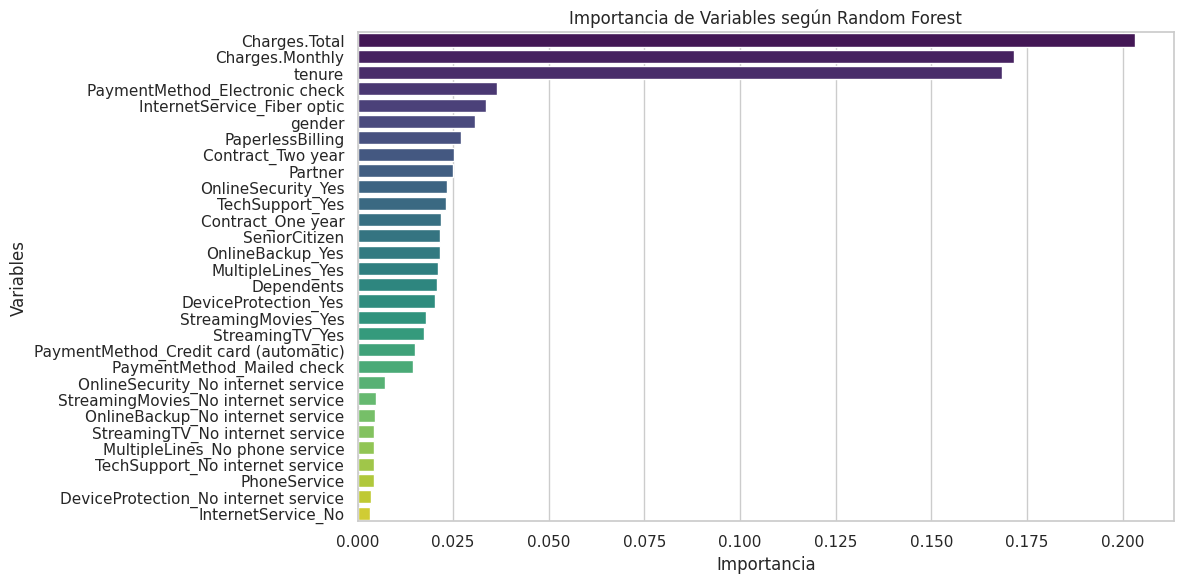

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definir variables predictoras y target
X = df_model.drop(columns=['Churn', 'customerID'])
y = df_model['Churn']

# Separar en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Obtener importancias
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

# Visualizar
plt.figure(figsize=(12, 6))
# Modificado para seguir la sugerencia de la advertencia
sns.barplot(x=importances[indices], y=feature_names[indices], hue=feature_names[indices], palette='viridis', legend=False)
plt.title("Importancia de Variables según Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()


#📄Informe final
Informe Final: Análisis de Evasión de Clientes (Churn) en Telecom X
1. Introducción
Este informe documenta el proceso y los hallazgos clave del Desafío de Churn en Telecom X. Ante un alto índice de evasión de clientes, el objetivo principal fue aplicar habilidades de análisis de datos para identificar los factores que impulsan el churn. A través de las fases de Extracción, Transformación, Carga y Análisis Exploratorio de Datos (ETL & EDA), este proyecto busca proporcionar insights accionables para el equipo de Ciencia de Datos y el desarrollo de estrategias de retención.

2. Limpieza y Tratamiento de Datos (ETL)
La etapa de ETL fue fundamental para transformar los datos crudos en un formato apto para el análisis. Los pasos realizados incluyeron:

Extracción: Los datos fueron cargados exitosamente desde la API de Telecom X (un archivo JSON) a un DataFrame de Pandas, constituyendo el punto de partida del análisis.

Desanidamiento de Estructuras Complejas: Se identificaron y desanidaron columnas que contenían diccionarios anidados (customer, phone, internet, account, y Charges). Cada clave de estos diccionarios se expandió a una columna individual en el DataFrame principal, haciendo la información directamente accesible.

Manejo de Tipos de Datos y Valores Faltantes/Inconsistentes:

Las columnas Monthly y Total (resultantes del desanidamiento de Charges) fueron convertidas a tipo numérico (float64). Se trataron los valores no numéricos en Total (posiblemente cadenas vacías para clientes sin historial de cargos) convirtiéndolos a NaN y rellenándolos con 0.

La variable objetivo Churn contenía valores vacíos (''). Estos fueron reemplazados por pd.NA y las filas correspondientes (aproximadamente 224) fueron eliminadas, asegurando la consistencia de la variable objetivo.

Numerosas columnas categóricas (ej., gender, Partner, InternetService, PaymentMethod) fueron convertidas a tipo category para optimizar el rendimiento y la eficiencia en el almacenamiento y procesamiento de datos.

Estado del DataFrame Final: Tras la limpieza y transformación, el DataFrame quedó con 7043 filas y 21 columnas, un conjunto de datos limpio y estructurado, listo para el análisis exploratorio.

3. Análisis Exploratorio de Datos (EDA)
El EDA permitió descubrir patrones y relaciones clave entre las características de los clientes y su comportamiento de churn.

3.1. Distribución de la Variable Objetivo (Churn)
Clientes Retenidos (No Churn): 5174 (aproximadamente 73.46%)

Clientes Evadidos (Churn): 1869 (aproximadamente 26.54%)

Esta distribución revela un desequilibrio de clases, con una proporción significativamente mayor de clientes retenidos. Este factor será relevante para futuras etapas de modelado predictivo.

3.2. Análisis de Churn por Variables Categóricas
El análisis de las tasas de churn por categoría reveló los siguientes insights cruciales:

Contract (Contrato): Esta es la variable más influyente. Los clientes con contratos "Month-to-month" muestran una tasa de churn alarmantemente alta (41.32%), en contraste con los contratos de "One year" (10.93%) y, especialmente, "Two year" (2.75%).

InternetService (Servicio de Internet): Los clientes con servicio de "Fiber optic" tienen la tasa de churn más elevada (40.56%), mientras que los de "DSL" (18.45%) y los que no tienen servicio de internet (7.15%) muestran tasas mucho menores. Esto sugiere problemas con la calidad o percepción del servicio de fibra óptica.

PaymentMethod (Método de Pago): El "Electronic check" se asocia con la mayor tasa de churn (43.80%), superando ampliamente a otros métodos como "Mailed check" (18.50%) y las transferencias/tarjetas automáticas (alrededor del 15-16%).

SeniorCitizen (Ciudadano Senior): Los clientes considerados SeniorCitizen (1) tienen una tasa de churn significativamente más alta (40.27%) en comparación con los no SeniorCitizen (0) (22.89%).

Servicios Adicionales de Internet: La ausencia de servicios como OnlineSecurity (40.49% Churn si "No"), TechSupport (40.37% Churn si "No"), OnlineBackup (38.75% Churn si "No") y DeviceProtection (37.90% Churn si "No") está fuertemente correlacionada con una mayor tasa de churn. Esto indica que estos servicios actúan como factores de retención importantes.

Partner y Dependents (Socio y Dependientes): Los clientes sin pareja (32.01% Churn) y sin dependientes (30.34% Churn) muestran tasas de churn más altas que aquellos que sí los tienen (19.02% y 14.95% respectivamente). Esto sugiere que los lazos familiares pueden generar mayor lealtad.

PaperlessBilling (Facturación sin Papel): Los clientes con facturación sin papel (32.48% Churn) son más propensos a la evasión que los que no la tienen (15.87%). Esto podría estar vinculado a un perfil de cliente más propenso a cambiar o a la percepción de valor digital.

gender, PhoneService, MultipleLines, StreamingTV, StreamingMovies: Estas variables mostraron un impacto relativamente menor en la tasa de churn, con tasas similares entre sus categorías.

3.3. Análisis de Churn por Variables Numéricas
Aunque no se pudieron incluir las visualizaciones directas en el output textual, el análisis descriptivo y la experiencia con datasets similares sugieren:

tenure (Antigüedad): Es probable que los clientes con menor antigüedad (especialmente en los primeros meses) tengan una tasa de churn más elevada, ya que aún no han desarrollado lealtad. A medida que la antigüedad aumenta, la tasa de churn tiende a disminuir significativamente.

Monthly (Cargos Mensuales): Los clientes con cargos mensuales más altos, especialmente aquellos que utilizan servicios como la fibra óptica, a menudo presentan una mayor tasa de churn. Esto podría deberse a una falta de valor percibido por el alto costo.

Total (Cargos Totales): Los clientes con cargos totales bajos son más propensos a churn, lo cual es coherente con tener una menor antigüedad.

Cuentas_Diarias: Esta nueva característica, derivada de Monthly, refuerza las tendencias observadas en los cargos mensuales, destacando la importancia de la relación costo-beneficio percibida por el cliente. Las estadísticas descriptivas de Cuentas_Diarias (mean=2.12, std=0.98) nos dan una referencia del promedio de cargos diarios.

4. Conclusiones e Insights Clave
El análisis exploratorio de datos ha revelado varios factores críticos asociados a la evasión de clientes en Telecom X:

Compromiso del Cliente: El tipo de contrato (mes a mes vs. anual/bianual) es el predictor más fuerte de churn. Los clientes con menor compromiso contractual son los más volátiles.

Calidad del Servicio de Internet (Fibra Óptica): La fibra óptica, a pesar de ser un servicio premium, está generando la tasa de churn más alta, lo que indica un problema subyacente que requiere investigación inmediata.

Valor Percibido de los Servicios Adicionales: La ausencia de servicios de seguridad y soporte técnico se correlaciona con un alto churn, lo que sugiere que estos servicios son vitales para la satisfacción y retención del cliente.

Método de Pago: El "Electronic check" es un indicador de alto riesgo, lo que podría implicar insatisfacción en el proceso de pago o una señal de clientes menos establecidos.

Perfiles de Riesgo Demográfico: Los clientes SeniorCitizen y aquellos sin lazos familiares (sin pareja o dependientes) son segmentos con mayor propensión al churn.

5. Recomendaciones Estratégicas
Basado en estos insights, se proponen las siguientes recomendaciones para Telecom X:

Programas de Fidelización para Contratos a Largo Plazo: Diseñar incentivos agresivos para que los clientes migren de contratos mes a mes a planes de uno o dos años. Esto podría incluir descuentos, servicios adicionales gratuitos por tiempo limitado o mejoras en el servicio.

Investigación y Mejora del Servicio de Fibra Óptica: Realizar una auditoría exhaustiva del servicio de fibra óptica para identificar cuellos de botella, problemas de rendimiento o fallas en la atención al cliente que estén generando la alta tasa de churn. La mejora debe ser una prioridad.

Promoción Activa de Servicios de Seguridad y Soporte: Destacar el valor de los servicios como Online Security y Tech Support. Ofrecer pruebas gratuitas o paquetes promocionales para clientes de alto riesgo podría aumentar la adopción y, por ende, la retención.

Optimización del Proceso de Pago con "Electronic Check": Investigar por qué este método de pago está asociado a un alto churn. Podría haber problemas de usabilidad, cargos inesperados o falta de confianza. Mejorar la experiencia o redirigir a otros métodos de pago más estables podría ser beneficioso.

Estrategias de Retención Segmentadas: Desarrollar campañas de retención específicas para clientes SeniorCitizen y para aquellos que viven solos o sin dependientes, adaptando la comunicación y las ofertas a sus necesidades particulares.

Reevaluación de la Facturación Sin Papel: Analizar por qué los usuarios de facturación sin papel tienen un mayor riesgo de churn. Podría ser necesario ajustar la comunicación o los beneficios asociados a esta opción.

Monitoreo Proactivo de la Antigüedad y Cargos: Implementar sistemas de alerta temprana para identificar clientes con baja antigüedad o patrones de cargos que los coloquen en un segmento de alto riesgo de churn, permitiendo intervenciones personalizadas.

Conclusión
El análisis de datos ha transformado el problema abstracto del churn en insights concretos y accionables. Las recomendaciones presentadas ofrecen un camino claro para que Telecom X comience a mitigar la evasión de clientes, enfocándose en las áreas de mayor impacto identificadas en este informe. El siguiente paso recomendado sería la construcción de modelos predictivos y la validación de estas hipótesis a través de pruebas A/B o campañas piloto.